<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [248]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import csv


plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovateable:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [249]:
# Load the data
house = pd.read_csv('./housing.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [250]:
# A:
print("Total number of observations: ", house.shape[0])

Total number of observations:  1460


# Data Cleaning

**Removal of locations**

In [251]:
description = []
with open('data_description.txt') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter='\t')
    for row in csv_reader:
        print(" ".join(row))
        description.append(", ".join(row))

#enumrating description tells us where we can find the description related to the neighbourhood
neighbourhood = [neighbour.replace(' ', '').split(',')[0] for neighbour in description[82:107]]

# we drop all rows that are not within the physical limits of Ames 
for index, row in house.iterrows():
    if row['Neighborhood'] not in neighbourhood:
        house.drop(index, inplace=True)

MSSubClass: Identifies the type of dwelling involved in the sale. 

        20 1-STORY 1946 & NEWER ALL STYLES
        30 1-STORY 1945 & OLDER
        40 1-STORY W/FINISHED ATTIC ALL AGES
        45 1-1/2 STORY - UNFINISHED ALL AGES
        50 1-1/2 STORY FINISHED ALL AGES
        60 2-STORY 1946 & NEWER
        70 2-STORY 1945 & OLDER
        75 2-1/2 STORY ALL AGES
        80 SPLIT OR MULTI-LEVEL
        85 SPLIT FOYER
        90 DUPLEX - ALL STYLES AND AGES
       120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150 1-1/2 STORY PUD - ALL AGES
       160 2-STORY PUD - 1946 & NEWER
       180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190 2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
  
       A Agriculture
       C Commercial
       FV Floating Village Residential
       I Industrial
       RH Residential High Density
       RL Residential Low Density
       RP Residential Low Density Park 
       RM

In [252]:
print("Total number of observations after the removal of locations outside the specified city limits: ", \
      house.shape[0])  

Total number of observations after the removal of locations outside the specified city limits:  1235


**NaN Values**

In [253]:
#let's take a closer look at the columns with null values
column_null = house.columns[house.isnull().any()]
null_columns = house[column_null]
pd.DataFrame(null_columns.isnull().sum(), columns = ['null_count'])

,null_count
LotFrontage,220
Alley,1145
MasVnrType,8
MasVnrArea,8
BsmtQual,27
BsmtCond,27
BsmtExposure,28
BsmtFinType1,27
BsmtFinType2,28
Electrical,1


We can check if most of these columns do actually contain null values by reading the data description. What we typically find is that NaN stands for none in most columns; the few exceptions are MasVnrType, MasVnrArea, Electrical, Lotfrontage. We can use the fact that most of these columns are closely related to each other to help us decide on what we should do with the null values. 

Remarks:
- We notice that BsmtExposure and BsmtFinType2 has one more null value than we would probably expect 
- We can use the relation between MasVnrType and MasVnrArea to come to a conclusion on what to do with the null values since the data description does not contain any information on null values for these two columns
- LotFrontage require special care because it is most likely an extremely important predictor of house prices and it should not contain null values in the first place since LotArea has no null values

In [254]:
house[house.BsmtExposure.isnull()][['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].loc[948, :]

BsmtExposure    NaN
BsmtFinType1    Unf
BsmtFinType2    Unf
Name: 948, dtype: object

In [255]:
house[house.BsmtFinType2.isnull()][['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].loc[332, :]

BsmtExposure     No
BsmtFinType1    GLQ
BsmtFinType2    NaN
Name: 332, dtype: object

We pull out the only row that does not contain null values for BsmtFinType1/2 to explore what is going on. We find that BsmtExposure is a null value for unfinished basements. When we subset for null values in BsmtFinType2, there is nothing that indicates anything streange is going on. 

In [256]:
print('The sum of MiscVal for null MiscFeatures is: ', \
      house[house.MiscFeature.isnull()][['MiscFeature', 'MiscVal']]['MiscVal'].sum())

The sum of MiscVal for null MiscFeatures is:  0


We subset on null MiscFeatures and take the sum of MiscVal, which we would expect to be 0 if the house actually contained no MiscFeatures.

In [257]:
house[house.GarageYrBlt.isnull()][['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageQual']].isnull().sum()

GarageYrBlt     75
GarageType      75
GarageFinish    75
GarageQual      75
GarageQual      75
dtype: int64

We subset on null values for GarageYrBlt and subset again on related features such as GarageType, GarageQual, etc and find the total null values in their column, which we would expect to be 75 if the house had no garage.

In [258]:
house[house.MasVnrArea.isnull()][['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [259]:
house[house.MasVnrType == 'None'][['MasVnrType', 'MasVnrArea']].head()

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0


We subset on null values for MasVnrArea and subset again on MasVnrType. We find that when MasVnrArea has null values, MasVnrType is also null implying that these 8 houses do not use Masonry materials. Subsequently, I think it would be fair to classify the null values for MasVnrType as 'None' and MasVnrArea as 0

In [260]:
house[house.Electrical.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


**LotFrontage**

In [261]:
house[house.LotFrontage.isnull()][['LotFrontage', 'LotArea']].head(10)

,LotFrontage,LotArea
7,NaN,10382
12,NaN,12968
24,NaN,8246
31,NaN,8544
42,NaN,9180
43,NaN,9200
50,NaN,13869
64,NaN,9375
84,NaN,8530
95,NaN,9765


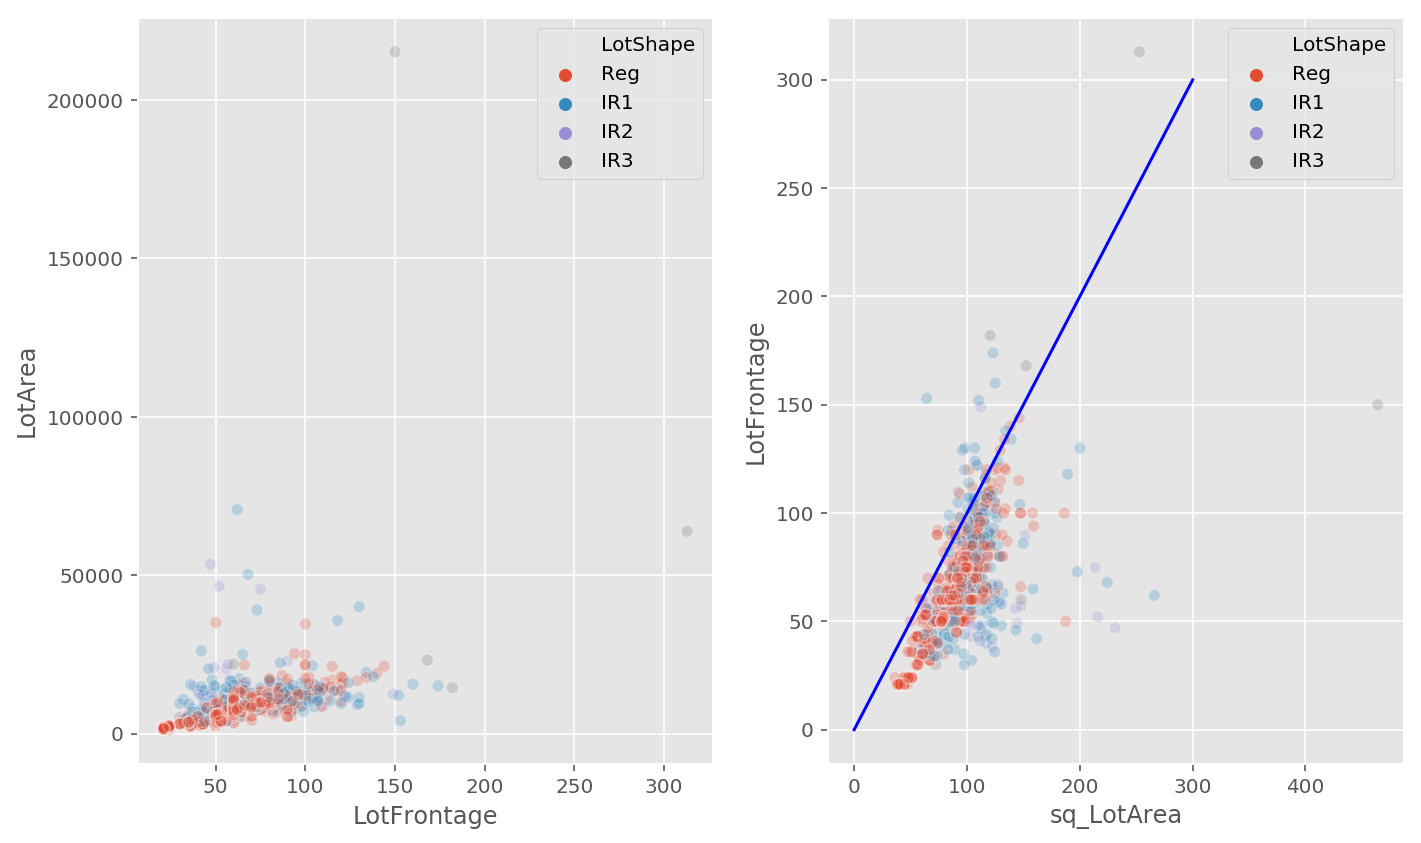

In [262]:
lot_df = house[~house.LotFrontage.isnull()][['LotFrontage', 'LotArea', 'BldgType', 'LotShape', 'LotConfig', 'Neighborhood', 'GarageArea', 'GrLivArea']]
lot_df['sq_LotArea'] = lot_df.LotArea.map(lambda x: np.sqrt(x))
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(x='LotFrontage', y='LotArea', hue='LotShape', alpha=0.25, data=lot_df, ax=ax[0])
sns.scatterplot(x='sq_LotArea', y='LotFrontage', hue='LotShape', alpha=0.25, data=lot_df, ax=ax[1])
ax[1].plot([0, 300], [0, 300], color='blue')

fig.tight_layout();

We plot the 45 degree line to show that the sq_LotArea does not exactly correspond LotFrontage. However, we see that the relationship between our y- and x-variables are linear so we can use a Linear Regression model to try and predict the missing LotFrontage values.

In [263]:
lot_df['error'] = abs(lot_df.sq_LotArea - lot_df.LotFrontage) 
print("LotFrontage Standard Deviation: ", lot_df.LotFrontage.std())
print('The mean absolute error ~ sq_LotArea: ', lot_df.error.mean())
print('The mean squared error ~ sq_LotArea: ', ((lot_df.sq_LotArea - lot_df.LotFrontage)**2).mean())

LotFrontage Standard Deviation:  24.235756697935127
The mean absolute error ~ sq_LotArea:  28.847673952167806
The mean squared error ~ sq_LotArea:  1264.5865474384498


We use the mean absolute error here, otherwise we would not get an error that is comparable to the standard deviation of the LotFrontage

In [264]:
lot_frontage = lot_df.copy()
y_frontage = lot_frontage.pop('LotFrontage')
X_frontage = lot_frontage.drop(columns = ['sq_LotArea', 'error']) # we will play around with both sq_LotArea and LotArea as features in our model
X_frontage_sq = lot_frontage.drop(columns = ['LotArea', 'error'])

In [265]:
from sklearn.model_selection import train_test_split
X_dummies = pd.get_dummies(X_frontage, columns=['BldgType', 'LotShape','LotConfig', 'Neighborhood'], drop_first=True)
X_dummies_sq = pd.get_dummies(X_frontage_sq, columns=['BldgType', 'LotShape','LotConfig', 'Neighborhood'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_frontage, test_size=0.2, shuffle=True, random_state=1)
X_train_sq, X_test_sq, y_train_sq, y_test_sq = train_test_split(X_dummies_sq, y_frontage, test_size=0.2, shuffle=True, random_state=1)



I select variables that I believe somewhat impact the size of LotFrontage. This can lead to omission variable bias and I am yet to model in interaction effects, which I will look into more closely when I model the house prices

In [266]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score

slr = LinearRegression()
slr.fit(X_train, y_train)
print("Test score ~ LotArea: ", slr.score(X_test, y_test))
print("Cross_val_score ~ LotArea: ", np.mean(cross_val_score(slr, X_train, y_train, cv = 5)))
print('Mean absolute error for test set ~ LotArea: ', (abs(y_test - slr.predict(X_test))).mean())

Test score ~ LotArea:  0.561545541404169
Cross_val_score ~ LotArea:  0.48763580635877146
Mean absolute error for test set ~ LotArea:  10.46288681218777


In [267]:
slr_sq = LinearRegression()
slr_sq.fit(X_train_sq, y_train_sq)
print("Test score ~ sq_LotArea: ", slr_sq.score(X_test_sq, y_test_sq))
print("Cross_val_score ~ Sq_LotArea: ", np.mean(cross_val_score(slr_sq, X_train_sq, y_train_sq, cv = 5)))
print('Mean absolute error for test set ~ sq_LotArea: ', (abs(y_test_sq - slr_sq.predict(X_test_sq))).mean())

Test score ~ sq_LotArea:  0.5728193827908125
Cross_val_score ~ Sq_LotArea:  0.5132642747626491
Mean absolute error for test set ~ sq_LotArea:  10.243436823783622


In [268]:
lot_df_train, lot_df_test = train_test_split(lot_df, test_size=0.2, shuffle=True, random_state=1)

# Groupby LotFrontage means for different features on the training set
neigh_means = lot_df_train.groupby('Neighborhood').mean()['LotFrontage']
bldg_means = lot_df_train.groupby('BldgType').mean()['LotFrontage']
shape_means = lot_df_train.groupby('LotShape').mean()['LotFrontage']
config_means = lot_df_train.groupby('LotConfig').mean()['LotFrontage']


# merging the Groupby objects on the training sets with the test sets 
lot_df_neigh = lot_df_test.merge(neigh_means, left_on = 'Neighborhood', right_on=neigh_means.index)
lot_df_bldg = lot_df_test.merge(bldg_means, left_on = 'BldgType', right_on=bldg_means.index)
lot_df_shape = lot_df_test.merge(shape_means, left_on = 'LotShape', right_on=shape_means.index)
lot_df_config = lot_df_test.merge(config_means, left_on = 'LotConfig', right_on=config_means.index)


lot_df_neigh.tail()

,LotFrontage_x,LotArea,BldgType,LotShape,LotConfig,Neighborhood,GarageArea,GrLivArea,sq_LotArea,error,LotFrontage_y
198,52.0,6292,1Fam,Reg,Inside,SWISU,160,790,79.322128,27.322128,59.400000
199,60.0,6000,1Fam,Reg,Inside,SWISU,0,1522,77.459667,17.459667,59.400000
200,52.0,46589,1Fam,IR2,CulDSac,NoRidge,711,2448,215.844852,163.844852,93.233333
201,92.0,11764,1Fam,IR1,CulDSac,NoRidge,671,2270,108.461975,16.461975,93.233333
202,91.0,10437,1Fam,IR1,Inside,NoRidge,839,2113,102.161637,11.161637,93.233333


In [269]:
print("Mean absolute error using neighborhood means: ", (abs(lot_df_neigh.LotFrontage_x - lot_df_neigh.LotFrontage_y)).mean())
print("Mean absolute error using BldgType means: ", (abs(lot_df_bldg.LotFrontage_x - lot_df_bldg.LotFrontage_y)).mean())
print("Mean absolute error using LotShape means: ", (abs(lot_df_shape.LotFrontage_x - lot_df_shape.LotFrontage_y)).mean())
print("Mean absolute error using LotConfig means: ", (abs(lot_df_config.LotFrontage_x - lot_df_config.LotFrontage_y)).mean())
print("\nMean absolute error using overall LotFrontage mean: ", (abs(lot_df_test.LotFrontage - lot_df_train.LotFrontage.mean())).mean())
print("\nMean absolute error using overall ~ sq_LotArea mean: ", (abs(lot_df_test.LotFrontage - lot_df_train.sq_LotArea.mean())).mean())


Mean absolute error using neighborhood means:  13.801769873926782
Mean absolute error using BldgType means:  14.201740262327915
Mean absolute error using LotShape means:  16.630868482385413
Mean absolute error using LotConfig means:  16.52825527960921

Mean absolute error using overall LotFrontage mean:  17.114714018782298

Mean absolute error using overall ~ sq_LotArea mean:  31.62899071668349


Since I will be training my model on rows that don't have NaN values for LotFrontage, we can think of those that do have NaN values as "unseen" data, which is why we use a test set to simulate unseen data. In order to get a fair comparison, I decided to use the groupby means for different features i.e. neighborhood, BldgType, etc on the training set and insert the groupby mean values as our guess for the LotFrontage on the test set. Thus, we can get a fair comparison on the mean absolute error on the test set, which is why we will go with the second model ~ sqrt_LotArea because it gives us the lowest MAE when predicting the LotFrontage

In [270]:
#train our data on the non-null observations
lot_df_obs = house[~house.LotFrontage.isnull()][['LotFrontage', 'LotArea', 'BldgType', 'LotShape', 'LotConfig', 'Neighborhood', 'GarageArea', 'GrLivArea']]
lot_df_obs['LotArea'] = lot_df_obs.LotArea.map(lambda x: np.sqrt(x))
lot_frontage = lot_df_obs.pop('LotFrontage') #pop out the predictor variable
lot_df_dummy = pd.get_dummies(lot_df_obs, columns = lot_df_obs.select_dtypes('object').columns, drop_first=True)

#we will use the model to fill in the missing LotFrontage values 
lot_df_null = house[house.LotFrontage.isnull()][['LotArea', 'BldgType', 'LotShape', 'LotConfig', 'Neighborhood', 'GarageArea', 'GrLivArea']]
lot_df_null['LotArea'] = lot_df_null.LotArea.map(lambda x: np.sqrt(x))
lot_df_null_dummy = pd.get_dummies(lot_df_null, columns = lot_df_null.select_dtypes('object').columns, drop_first=True)

for i in list(lot_df_dummy.columns):
    if i not in list(lot_df_null_dummy.columns):
        print(i)

LotConfig_FR3
Neighborhood_Blueste
Neighborhood_BrDale


In [271]:
lot_df_null_dummy = lot_df_null_dummy.reindex(columns = lot_df_dummy.columns, fill_value=0)

In [272]:
lr = LinearRegression()
lr.fit(lot_df_dummy, lot_frontage)
lot_df_null['LotFrontage'] = lr.predict(lot_df_null_dummy)

**Handling Null Values**

In [273]:
house.LotFrontage.fillna(lot_df_null.LotFrontage, inplace=True)
house.MasVnrType.fillna('None', inplace=True)
house.MasVnrArea.fillna(0, inplace=True)
house.GarageYrBlt.fillna(0, inplace=True)

In [274]:
house[house.Electrical.isna() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [275]:
house.drop(index=1379, inplace=True)

In [276]:
house.fillna('NA', inplace = True) #quotation marks are needed otherwise it inteprets NA as a null value

In [277]:
print("Total number of null values left remaining in the dataset: ", house.isnull().sum().sum())
print("Total number of observations left remaining in the dataset: ", house.shape[0])

Total number of null values left remaining in the dataset:  0
Total number of observations left remaining in the dataset:  1234


In [278]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [279]:
house.drop(columns=['Id', 'MoSold'], inplace=True)

In [280]:
house['YearBuilt'] = house.YrSold - house.YearBuilt # turn the year built into the age of the house
house['YearRemodAdd'] = house.YrSold - house.YearRemodAdd

In [281]:
house.shape

(1234, 79)

# EDA

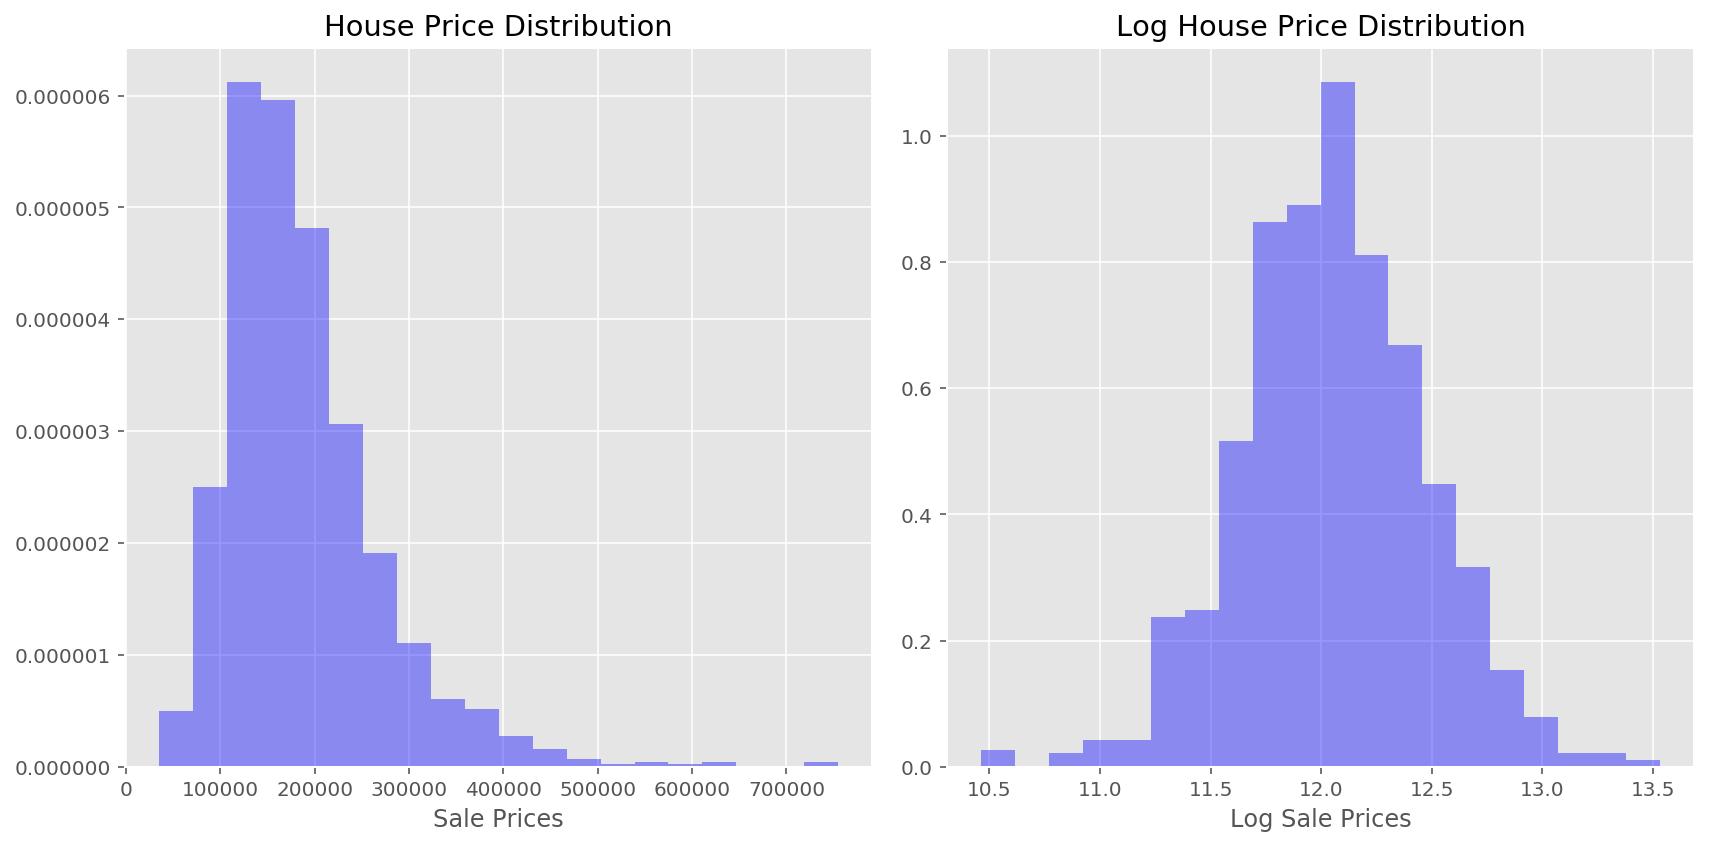

In [282]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(house.SalePrice, bins = 20, kde=False, norm_hist=True, ax=ax[0], color='blue')
ax[0].set_title('House Price Distribution')
ax[0].set_xlabel('Sale Prices');

sns.distplot(np.log(house.SalePrice), bins = 20, kde=False, norm_hist=True, ax=ax[1], color='blue')
ax[1].set_title('Log House Price Distribution')
ax[1].set_xlabel('Log Sale Prices')
fig.tight_layout();

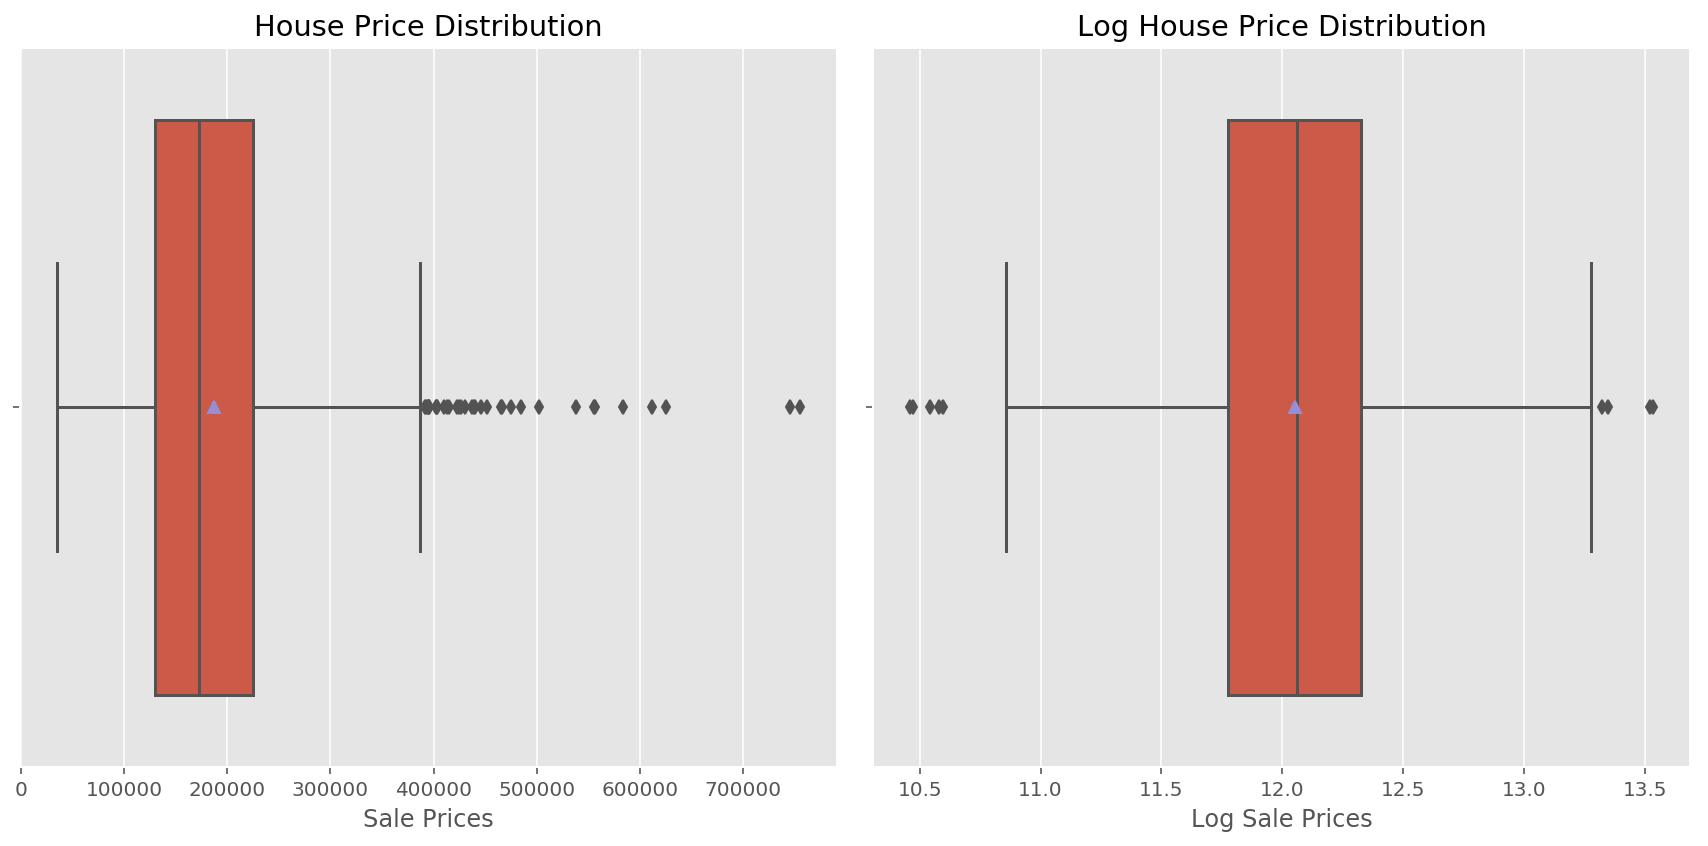

In [283]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(house.SalePrice, showmeans=True, whis=1.75, ax=ax[0])
ax[0].set_title('House Price Distribution')
ax[0].set_xlabel('Sale Prices')

sns.boxplot(np.log(house.SalePrice), showmeans=True, whis=1.75, ax=ax[1])
ax[1].set_title('Log House Price Distribution')
ax[1].set_xlabel('Log Sale Prices')
fig.tight_layout();

We will see later on why the distribution of the target variable is not neccessarily that important - it is often a common mistake that all variables, including the x- or predictor variables, have to be normally distributed. Instead, it is the conditional distribution and/or error distribution that has to be normally distribution. In the latter case, even if the error distribution was not normal, we can obtain the confidence intervals through other methods such as Bootstrapping anyway. 

However, there is still value to be extracted from looking at the house price distribution. We note that the house prices are positively skewed, as one would expect since the most expensive houses on the tail end of the distribution are skewing the mean to the right. When we take the log sale prices, the distribution becomes much more symmetrical and normal-like. We change the whis in the box plots from the default of 1.5 to 1.75 as it is approximately equal to µ ± 3std, which we will use to guide us in deciding on what we define as an outlier. 

# Relationship between Y and X variables

A good place to start is the relationship between the continuous features, especially those that are related to land

In [284]:
house.select_dtypes(exclude=['object']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

In [285]:
numeric = house[['LotFrontage', 'LotArea','BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF',\
                    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea','GarageArea', \
                   'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

In [286]:
x_var = numeric.columns[:12]
y_var = ['SalePrice']

def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

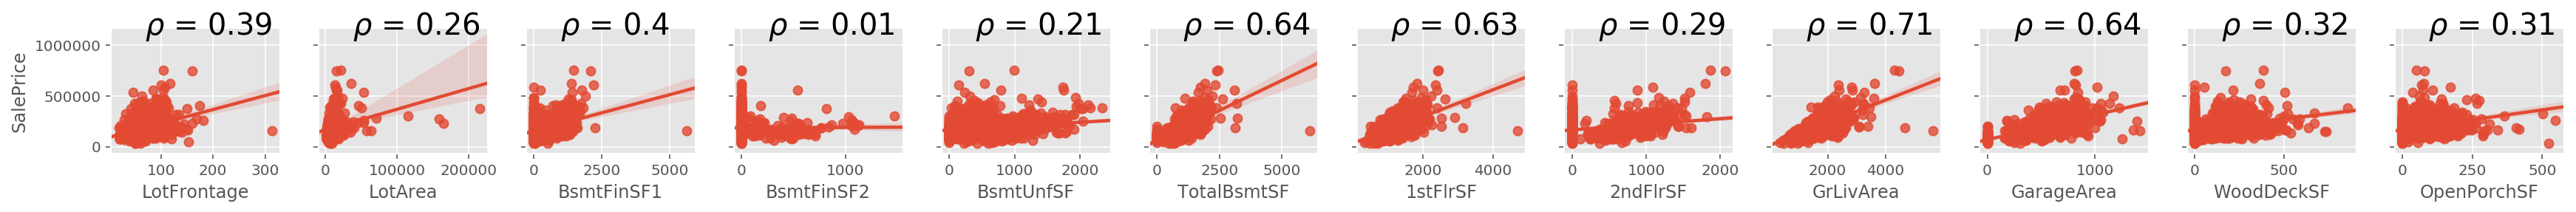

In [287]:
g = sns.PairGrid(data=numeric, x_vars=x_var, y_vars=y_var, height=2)
g = g.map(sns.regplot)
g = g.map(corr);

Stand out features appear to be TotalBsmtSF, 1stFlrSF, GrLivArea, and GarageArea. These features seem to be well correlated (positively) with house prices. I suspect that we may have to use some polynomial terms for some of these features as there appears to be upward curvature in the X-Y relationship, even in the highly correlated features such as TotalBsmtSF, 1stFlrSF, GrLivArea, etc

In [288]:
house.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

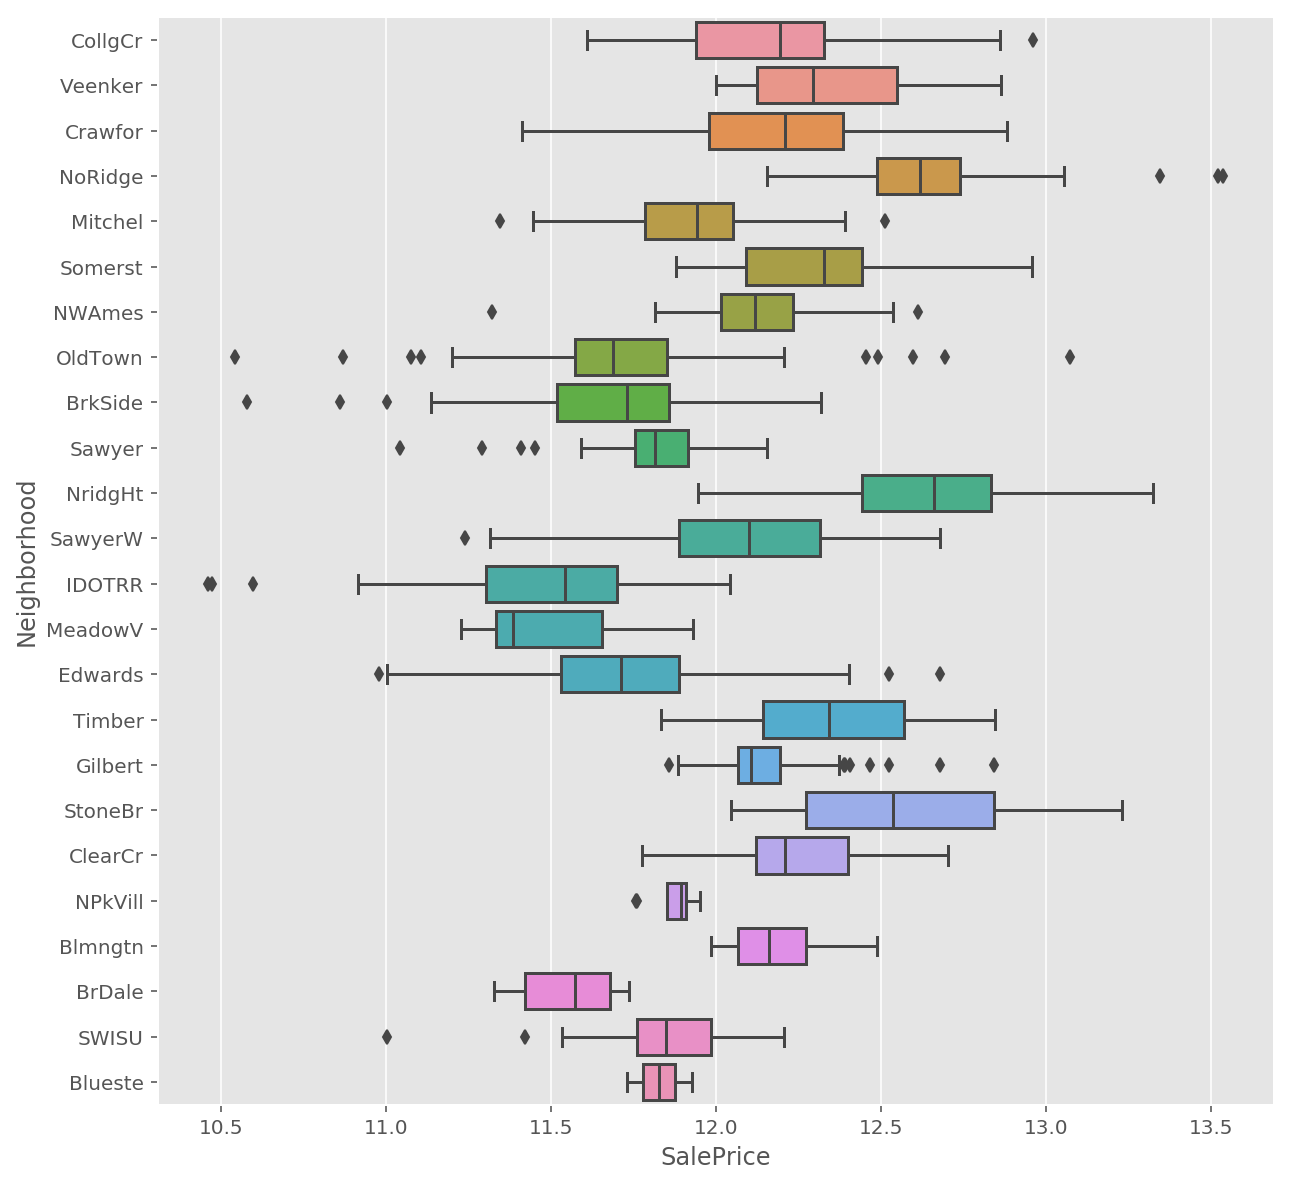

In [289]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x=np.log(house.SalePrice), y=house.Neighborhood, ax=ax);

We expect Neighborhood to be a strong predictor of house prices. If you remember from the distribution of the log house prices, the mean was ~ 12.0. It is easy to distinguish between expensive and non-expensive neighborhoods since the median log house price in certain neighborhood are to the right of the average house prices (NridgeHt, StoneBr, NoRidge) and vice versa (IDORTRR, MeadowV)

# Relationship between X-variables

In [290]:
predictor = house.select_dtypes(exclude='object')

In [291]:
predictor.drop(columns=['MSSubClass', 'YrSold'], inplace=True) #take out MSSubClass as it's categorical

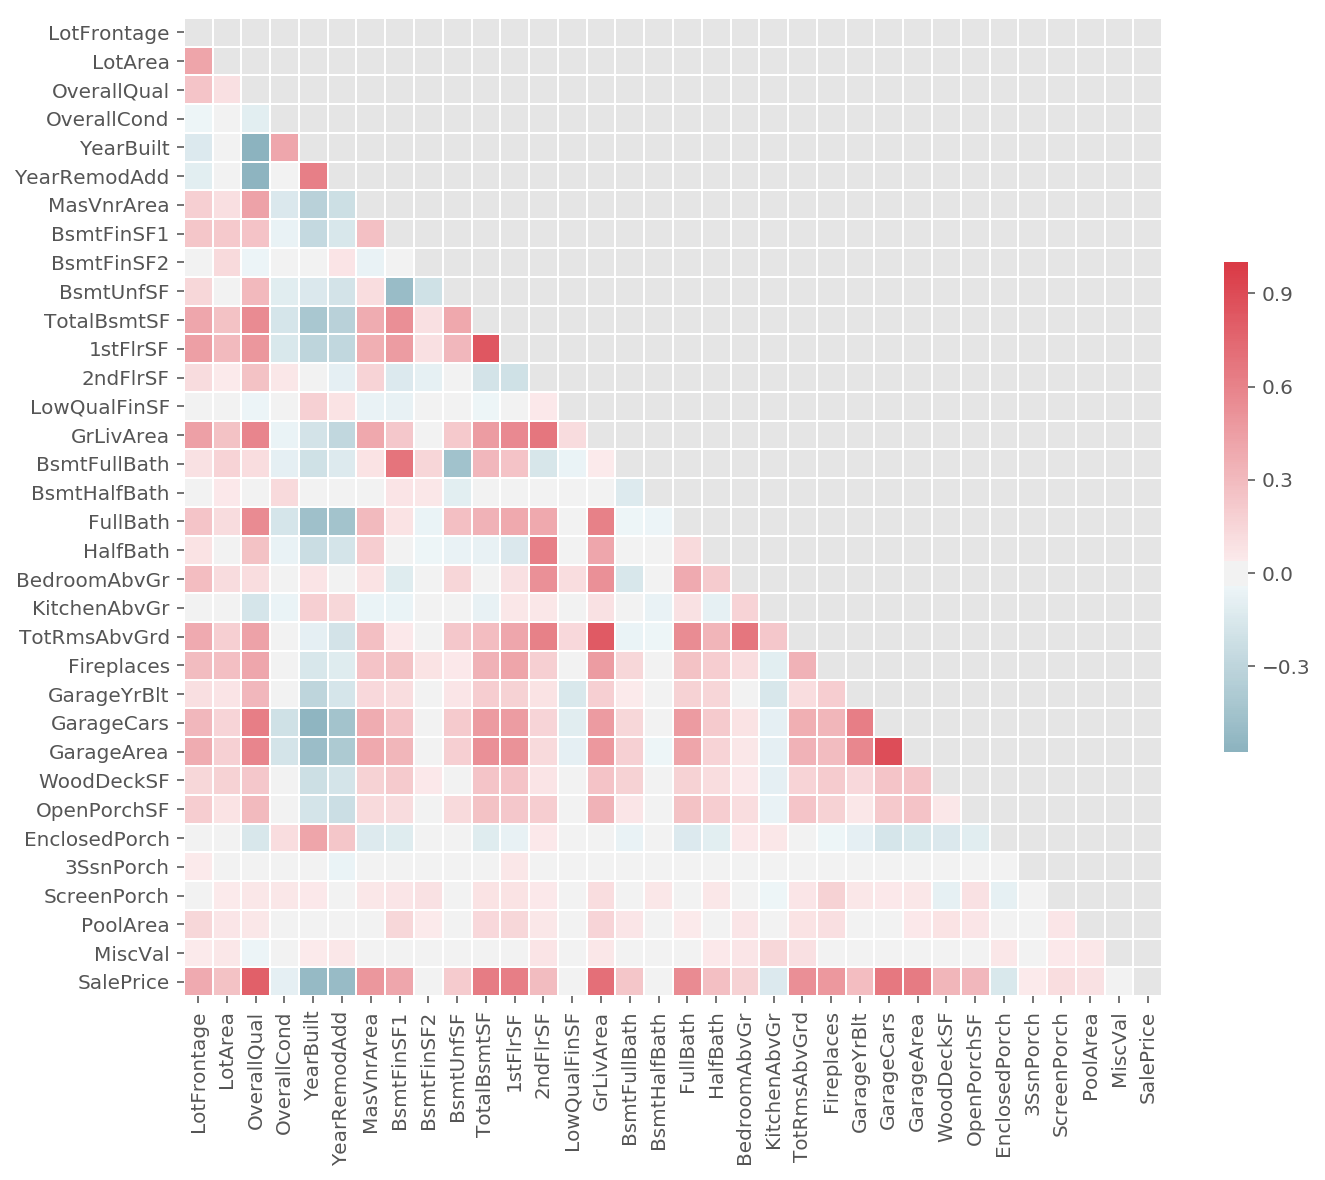

In [292]:
# Compute the correlation matrix
correlation = predictor.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [293]:
X_1 = list(correlation.columns)
X_2 = list(correlation.columns)

high_corr = []
for x1 in X_1:
    for x2 in X_2:
        if x1 != x2 and abs(np.corrcoef(house[x1], house[x2])[0][1]) >= 0.8:
            high_corr.append((x1, x2, np.corrcoef(house[x1], house[x2])[0][1]))

pd.DataFrame(high_corr, columns=['X1', 'X2', 'corr']).head(3)


,X1,X2,corr
0,TotalBsmtSF,1stFlrSF,0.838381
1,1stFlrSF,TotalBsmtSF,0.838381
2,GrLivArea,TotRmsAbvGrd,0.826157


# Interaction Effects

In [294]:
interaction = house[['SalePrice', 'GrLivArea', 'Neighborhood']]

In [295]:
interaction_df = pd.get_dummies(interaction, columns=['Neighborhood'])
interaction_one = interaction_df[interaction_df['Neighborhood_Edwards'] == 1]
interaction_zero = interaction_df[interaction_df['Neighborhood_Edwards'] == 0]

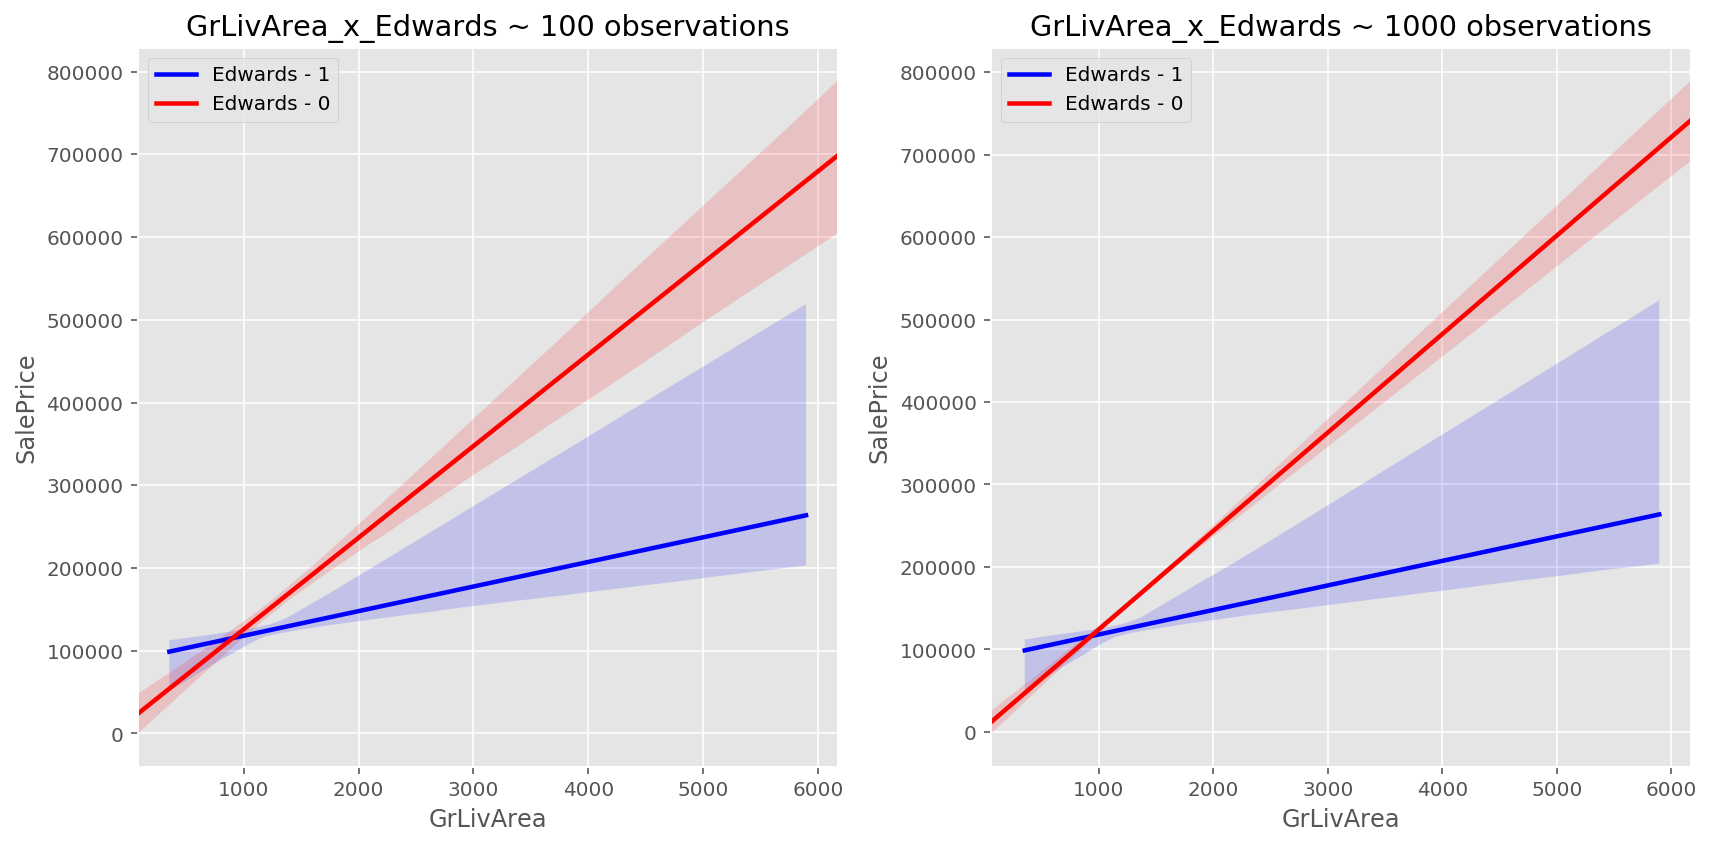

In [296]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.regplot(x='GrLivArea', y='SalePrice', data=interaction_one, marker='o', color='blue', scatter_kws={'s':0}, ax=ax[0])
sns.regplot(x='GrLivArea', y='SalePrice', data=interaction_zero[:100], marker='o', color='red', scatter_kws={'s':0}, ax=ax[0])
ax[0].legend(['Edwards - 1', 'Edwards - 0'], loc='upper left')
ax[0].set_title('GrLivArea_x_Edwards ~ 100 observations')

sns.regplot(x='GrLivArea', y='SalePrice', data=interaction_one, marker='o', color='blue', scatter_kws={'s':0}, ax=ax[1])
sns.regplot(x='GrLivArea', y='SalePrice', data=interaction_zero, marker='o', color='red', scatter_kws={'s':0}, ax=ax[1])
ax[1].set_title('GrLivArea_x_Edwards ~ 1000 observations')
ax[1].legend(['Edwards - 1', 'Edwards - 0'])

fig.tight_layout();

To demonstrate the need to consider interaction effects, we look at one significant interaction between GrLivArea and the neighborhood Edwards. If someone were to ask me to quantify how much the living area affects house prices, I would probably respond with 'it depends, which city/neighborhood are we talking about?'. This dependency is shown in the above regplots, where we can see that the lines do not have the same gradient and therefore not parallel. Further, we use two different numbers of observations for the class 0 {100, 1000) to show that the consistency in the estimators. 

I won't go through all the possible interactive features as I don't want to brute force the issue by cross multiplying all the features and running several models to see what gives me the best score. Even if one were to cross-multiply all features, there is no guarantee that the interaction effects that are 'significant' make sense or intepretable. It is also not feasible to plot and examine multiple regplots. Therefore, I will use a Manova/Mancova model to examine interaction effects, whilst making several (wrong) assumptions such as no covariance between the error terms and X-variables. The stated assumption may not be obvious why it is wrong but it is due to omission variable bias. As I'm only testing over a few variables, I make the assumption that the error term captures the omitted variables - some of which are obviously going to covary with the independent variables. However, this method is merely being used as guidance to see if there are less obvious interaction effects that I would not have considered otherwise. Hence, I have selected features that I believe could have a co-dependency e.g. perhaps the overall condition (OverallCond) of the house is dependent on the age of the house (YearBuilt) since the material that the house is made from tend to degrade over time. 

In [297]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

In [298]:
warnings.filterwarnings("ignore")
model = smf.ols(formula='np.log(SalePrice) ~ YearBuilt*OverallCond + np.log(GrLivArea)*np.log(LotFrontage) + np.log(GrLivArea)*np.log(LotArea) + np.log(GrLivArea)*C(Neighborhood) + C(GarageQual)*C(GarageCond) + OverallCond*C(Functional) + C(Condition1)*C(Condition2) + C(Exterior1st)*C(Exterior2nd) + OverallCond*C(Functional)*C(SaleType) + YearRemodAdd*OverallCond*OverallQual + np.log(GrLivArea)*TotRmsAbvGrd + C(ExterQual)*C(ExterCond) + C(BsmtQual)*C(BsmtCond)', data=house)
res = model.fit()
mancova = sm.stats.anova_lm(res, typ=2) 
mancova[mancova['PR(>F)'] < 0.05]

,sum_sq,df,F,PR(>F)
C(Neighborhood),3.574396,23.0,9.341681,1.260105e-29
C(GarageCond),0.493028,5.0,5.927236,2.060808e-05
C(Condition2),0.302983,7.0,2.601778,1.153885e-02
C(BsmtQual),0.292592,4.0,4.396969,3.624578e-02
C(BsmtCond),1.026020,4.0,15.418639,9.185314e-05
C(GarageQual):C(GarageCond),1.426015,25.0,3.428738,1.950307e-04
C(Condition1):C(Condition2),2.934570,56.0,3.149972,4.443404e-05
C(Functional):C(SaleType),1.263375,40.0,1.898552,3.588381e-02
C(BsmtQual):C(BsmtCond),1.145607,16.0,4.303939,1.047329e-04
YearBuilt,0.522632,1.0,31.415655,2.672263e-08


# Outliers

The reason why I have yet to remove outliers is because I would like base my judgements as to what constitutes as an outlier using the information above instead of relying on a nonsensical definition. The only time I will use a definition such as $\mu$ ± 3$\sigma$ is if there are too many outliers to be considered, even then I'd be reluctant to rely on such a definition. Rather, I believe that outliers should be judged on a case by case basis and whether they are reflective of reality. 

From the scatterplot of GrLivArea and SalePrice, there are a few points that look rather suspicious to me. Past the 4000 mark for GrLivArea, there are two points that catch my attention. Despite having such large living areas, which we know is strong correlated with house prices, there are two points that seem to be 'undervalued'. However, to get a true understanding of what is going on, we will need to explore the other features of the two points because it could be that the overall quality of the place is terrible or the houses are from neighborhoods that have a group mean, which is lower than the grand mean.

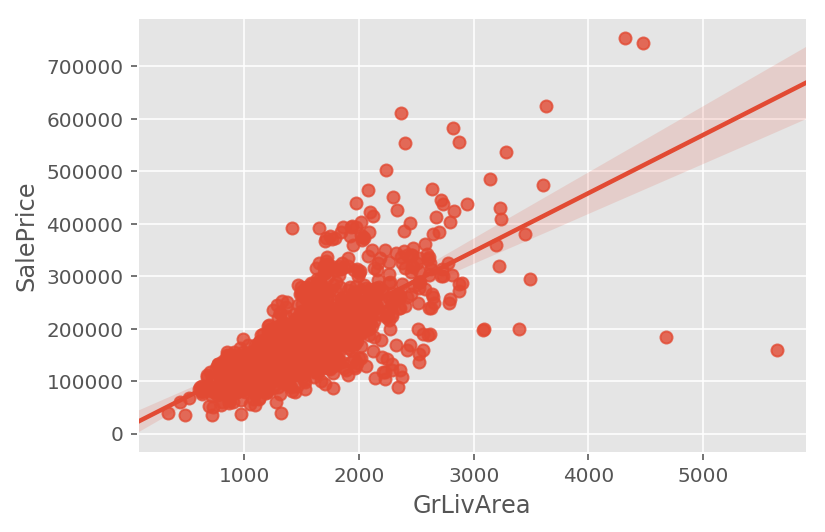

In [299]:
sns.regplot(x=house.GrLivArea, y=house.SalePrice);

In [300]:
house[house.GrLivArea > 4000][['Neighborhood', 'GrLivArea', '1stFlrSF', 'OverallQual', 'SaleCondition','SalePrice']]

,Neighborhood,GrLivArea,1stFlrSF,OverallQual,SaleCondition,SalePrice
523,Edwards,4676,3138,10,Partial,184750
691,NoRidge,4316,2444,10,Normal,755000
1182,NoRidge,4476,2411,10,Abnorml,745000
1298,Edwards,5642,4692,10,Partial,160000


In [301]:
house.groupby('Neighborhood').median()[['GrLivArea', 'OverallQual', 'SalePrice']].loc[['Edwards', 'NoRidge'], :]

,GrLivArea,OverallQual,SalePrice
Neighborhood,,,
Edwards,1200.0,5.0,121750.0
NoRidge,2418.0,8.0,301500.0


In [302]:
house[(house.SaleCondition == 'Partial') & (house.Neighborhood == 'Edwards')]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
117,20,RL,74.0,8536,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1,0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1125,1125,GasA,Gd,Y,SBrkr,1125,0,0,1125,0,0,1,1,2,1,TA,5,Typ,0,NA,Attchd,2007.0,Unf,2,430,TA,TA,Y,80,64,0,0,0,0,NA,NA,NA,0,2007,New,Partial,155000
523,60,RL,130.0,40094,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,0,-1,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NA,NA,NA,0,2007,New,Partial,184750
1297,180,RM,35.0,3675,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,1,0,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,2,0,2,1,TA,5,Typ,0,NA,Basment,2005.0,Fin,2,525,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,2006,New,Partial,140000
1298,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,0,0,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,2008,New,Partial,160000


If you look at the grouped medians for the two neighborhoods, we see that they are much bigger than the group median house prices, especially for the NoRidge Neighborhood. However, their living area and overall quality are also substantially above the medians. I will keep the two points in the NoRidge neighborhood as the expensive neighborhood they are in and the overall quality of the place lead me to believe they are somewhat realistic, along with the fact that I think it's fine to have one or two houses on the tail end of the distribution in this kind of study. On the otherhand, the two observations in the Edwards Neighborhood have a living area that is substantially above the median and an overall quality of 10, yet the two houses are not even the most expensive houses in the neighborhood (~$300k). Perhaps it is due to the sale condition being partial but when you look at the subset for 'partial' sales in the Edwards Neighborhood, it's still not apparent why the two outliers in question have the sale price that they do - in the case of observation 1298, it has a pool to go alongside an overall quality of 10 and a huge GrLivArea. This leads me to believe that the sale price for these two houses are not indicative of their true market value and I would deem them to be either unrealistic or an external factor that has not been accounted for in the dataset is in play such as the previous owners of the houses being desperate to sale the place, which is why they sold it below it's fair value.

In [303]:
house.drop(index=[523, 1298], inplace=True)

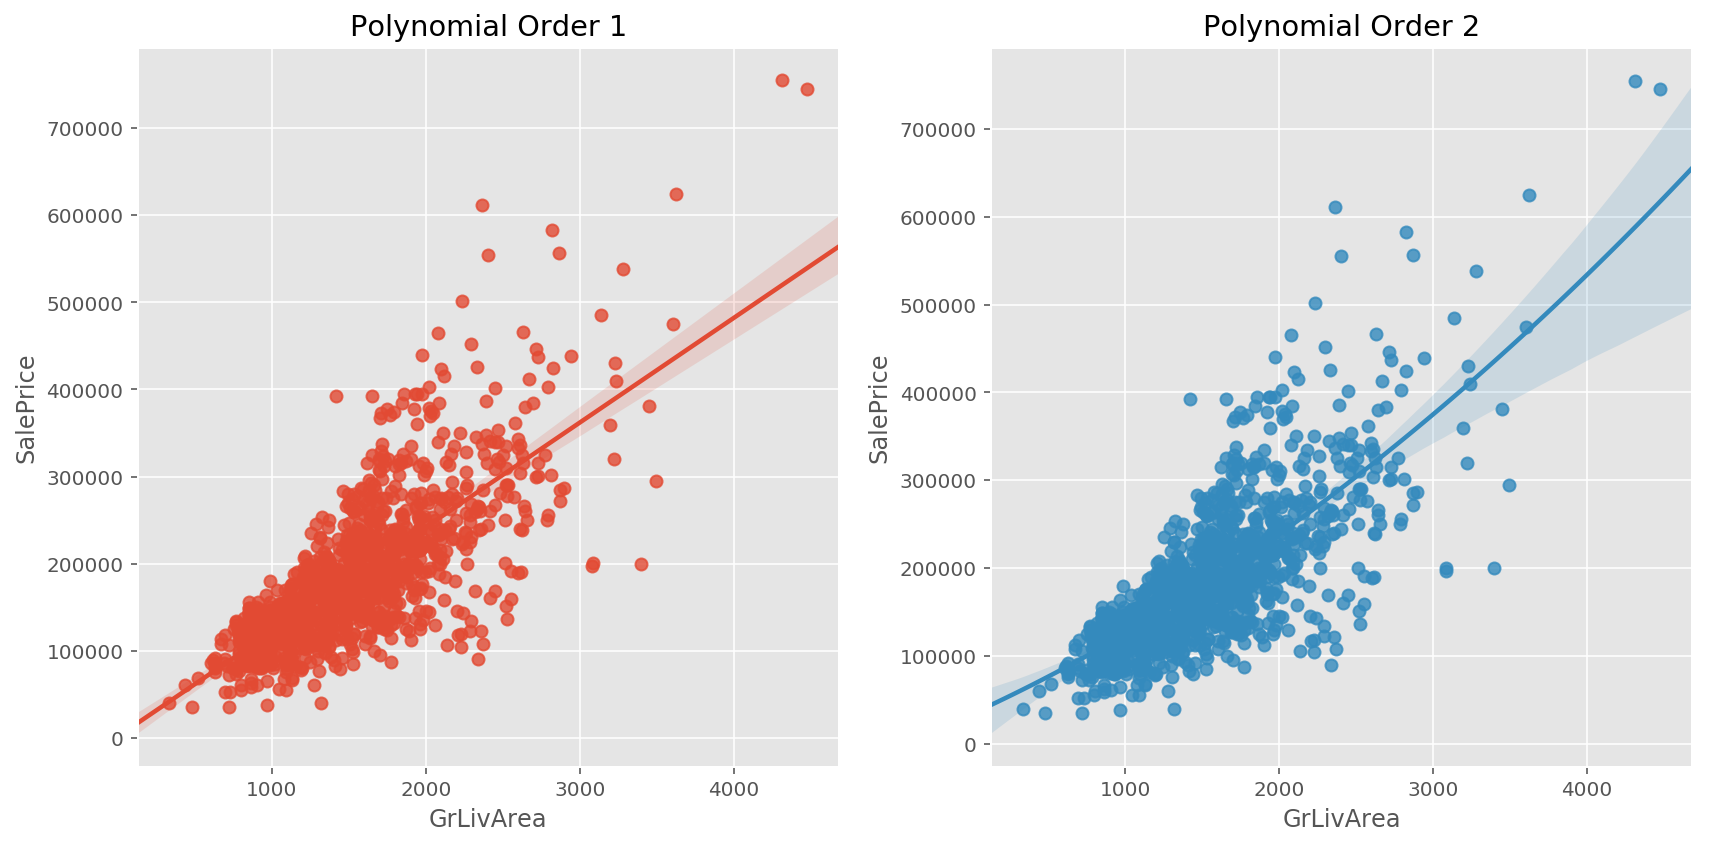

In [304]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=house, order = 1, ax=ax[0])
ax[0].set_title('Polynomial Order 1')
#ax[0].set_yscale('log')

sns.regplot(x='GrLivArea', y='SalePrice', data=house, order=2, ax=ax[1])
ax[1].set_title('Polynomial Order 2')
#ax[1].set_yscale('log')
fig.tight_layout();

In [305]:
house.shape

(1232, 79)

# Feature Engineering

We will divide the features into fixed and renovatable features. The idea behind this is we want to evaluate the effects of these renovatable features on a standalone basis i.e. all things remaining constant, how much will 1 unit increase in the overall quality lead to an increase in price. One might wonder why we don't just run a model on the renovatable features and assume the error term in the regression equation is made up of the fixed features. In the second part, I will show why you cannot do this - it leads to spurious relationships because the model starts over-estimating the effects due to the omitted variables. 

In [306]:
df = house.copy()
df['MSSubClass'] = df.MSSubClass.astype('str')

In [307]:
#Ordinal Features

Converters={'LotShape': {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4},
            'Utilities': {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4}, 
            'ExterQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
            'BsmtQual': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
            'BsmtCond': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
            'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'Electrical': {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5}, 
            'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},  
            'FireplaceQu': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
            'GarageFinish': {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}, 
            'GarageQual': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
            'GarageCond': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
            'PoolQC': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
            'Fence': {'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}, 
            'LandSlope': {'Sev': 1, 'Mod': 2, 'Gtl': 3}, 
            'GarageType': {'NA': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 
                                    'Basment': 4, 'Attchd': 5, '2Types': 6},
            'BsmtFinType1': {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 
                                      'GLQ': 6}, 
            'BsmtFinType2': {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 
                                      'GLQ': 6}, 
            'BsmtExposure': {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}}

df_convert = df.replace(Converters) # central air has not been included because dummifying would achieve the same results

In [308]:
df_convert['BsmtCond'] = df_convert.BsmtCond.astype(int)

In [309]:
renov = df_convert[['RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'ExterQual', 'ExterCond', 'BsmtCond',
            'BsmtQual','BsmtFinType1','BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir','Electrical', 'LowQualFinSF', 
            'KitchenQual', 'Functional', 'GarageFinish','GarageQual', 'GarageCond', 'FireplaceQu', 
            'PoolQC', 'YearRemodAdd', 'OverallQual', 'OverallCond', 'Fence', 'YrSold', 'SalePrice']]

fixed = df_convert[[col for col in house.columns if col not in renov.columns]]
fixed = pd.merge(fixed, renov[['YrSold', 'SalePrice']], left_index=True, right_index=True)

In [310]:
fixed = pd.get_dummies(fixed, columns=fixed.select_dtypes(include='object').columns, drop_first=True)
renov = pd.get_dummies(renov, columns=renov.select_dtypes(include='object').columns, drop_first=True)

**Interactions - Fixed Features**

In [311]:
col_dict = {'Neighborhood': [],
           'Condition1': [],
            'Condition2': []}

for x in fixed.columns:
    if 'Neigh'in x:
        col_dict['Neighborhood'].append(x)
    elif 'Condition1' in x:
        col_dict['Condition1'].append(x)
    elif 'Condition2' in x:
        col_dict['Condition2'].append(x)

In [312]:
fixed.shape

(1232, 140)

In [313]:
for x in col_dict['Neighborhood']:
    col_name = 'GrLivArea_x_' + x
    fixed[col_name] = fixed['GrLivArea'] * fixed[x]
    
for cond1 in col_dict['Condition1']:
    for cond2 in col_dict['Condition2']:
        cond = cond1 + '_x_' + cond2
        fixed[cond] = fixed[cond1] * fixed[cond2]

In [314]:
fixed['GrLivArea_x_LotFrontage'] = fixed['GrLivArea'] * fixed['LotFrontage']

In [315]:
print('The shape of the fixed features dataframe: ', fixed.shape)
print('The shape of the renovatable features dataframe: ', renov.shape)

The shape of the fixed features dataframe:  (1232, 220)
The shape of the renovatable features dataframe:  (1232, 71)


In [316]:
pd.options.display.max_columns=999
fixed.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,YearBuilt,MasVnrArea,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,PavedDrive_P,PavedDrive_Y,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GrLivArea_x_Neighborhood_Blueste,GrLivArea_x_Neighborhood_BrDale,GrLivArea_x_Neighborhood_BrkSide,GrLivArea_x_Neighborhood_ClearCr,GrLivArea_x_Neighborhood_CollgCr,GrLivArea_x_Neighborhood_Crawfor,GrLivArea_x_Neighborhood_Edwards,GrLivArea_x_Neighborhood_Gilbert,GrLivArea_x_Neighborhood_IDOTRR,GrLivArea_x_Neighborhood_MeadowV,GrLivArea_x_Neighborhood_Mitchel,GrLivArea_x_Neighborhood_NPkVill,GrLivArea_x_Neighborhood_NWAmes,GrLivArea_x_Neighborhood_NoRidge,GrLivArea_x_Neighborhood_NridgHt,GrLivArea_x_Neighborhood_OldTown,GrLivArea_x_Neighborhood_SWISU,GrLivArea_x_Neighborhood_Sawyer,GrLivArea_x_Neighborhood_SawyerW,GrLivArea_x_Neighborhood_Somerst,GrLivArea_x_Neighborhood_StoneBr,GrLivArea_x_Neighborhood_Timber,GrLivArea_x_Neighborhood_Veenker,Condition1_Feedr_x_Condition2_Feedr,Condition1_Feedr_x_Condition2_Norm,Condition1_Feedr_x_Condition2_PosA,Condition1_Feedr_x_Condition2_PosN,Condition1_Feedr_x_Condition2_RRAe,Condition1_Feedr_x_Condition2_RRAn,Condition1_Feedr_x_Condition2_RRNn,Condition1_Norm_x_Condition2_Feedr,Condition1_Norm_x_Condition2_Norm,Condition1_Norm_x_Condition2_PosA,Condition1_Norm_x_Condition2_PosN,Condition1_Norm_x_Condition2_RRAe,Condition1_Norm_x_Condition2_RRAn,Condition1_Norm_x_Condition2_RRNn,Condition1_PosA_x_Condition2_Feedr,Condition1_PosA_x_Condition2_Norm,Condition1_PosA_x_Condition2_PosA,Condition1_PosA_x_Condition2_PosN,Condition1_PosA_x_Condition2_RRAe,Condition1_PosA_x_Condition2_RRAn,Condition1_PosA_x_Condition2_RRNn,Condition1_PosN_x_Condition2_Feedr,Condition1_PosN_x_Condition2_Norm,Condition1_PosN_x_Condition2_PosA,Condition1_PosN_x_Condition2_PosN,Condition1_PosN_x_Condition2_RRAe,Condition1_PosN_x_Condition2_RRAn,Condition1_PosN_x_Condition2_RRNn,Condition1_RRAe_x_Condition2_Feedr,Condition1_RRAe_x_Condition2_Norm,Condition1_RRAe_x_Condition2_PosA,Condition1_RRAe_x_Condition2_PosN,Condition1_RRAe_x_Con

In [317]:
#continuous features
continuous_col = df.select_dtypes(exclude='object').drop(columns=['OverallQual', 'OverallCond','YearBuilt', 
                                                'YearRemodAdd','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                                                'HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
                                                'Fireplaces', 'GarageYrBlt', 'GarageCars', 'YrSold', 'LowQualFinSF']).columns

def log_function(df):
    for col in continuous_col:
        df[col] = np.log1p(df[col])
        
    for interaction in col_dict['Neighborhood']:
        df[interaction] = np.log1p(df[interaction])
        
    return df

log_fixed = fixed.apply(log_function, axis=1)

**Interactions - Renovatable Features**

In [318]:
renov['ExterQual_x_ExterCond'] = renov['ExterQual'] * renov['ExterCond']
renov['BsmtQual_x_BsmtCond'] = renov['BsmtQual'] * renov['BsmtCond']
renov['GarageQual_x_GarageCond'] = renov['GarageQual'] * renov['GarageCond']
renov['OverallQual_x_OverallCond'] = renov['OverallQual'] * renov['OverallCond']
renov['Remod_x_OverallCond'] = renov['YearRemodAdd'] * renov['OverallCond']

In [319]:
renov.head()

,ExterQual,ExterCond,BsmtCond,BsmtQual,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,LowQualFinSF,KitchenQual,GarageFinish,GarageQual,GarageCond,FireplaceQu,PoolQC,YearRemodAdd,OverallQual,OverallCond,Fence,YrSold,SalePrice,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,ExterQual_x_ExterCond,BsmtQual_x_BsmtCond,GarageQual_x_GarageCond,OverallQual_x_OverallCond,Remod_x_OverallCond
0,4,3,3,4,6,1,5,5,0,4,2,3,3,0,0,5,7,5,0,2008,208500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,12,12,9,35,25
1,3,3,3,4,5,1,5,5,0,3,2,3,3,3,0,31,6,8,0,2007,181500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,9,12,9,48,248
2,4,3,3,4,6,1,5,5,0,4,2,3,3,3,0,6,7,5,0,2008,223500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,12,12,9,35,30
3,3,3,4,3,5,1,4,5,0,4,1,3,3,4,0,36,7,5,0,2006,140000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,9,12,9,35,180
4,4,3,3,4,6,1,5,5,0,4,2,3,3,3,0,8,8,5,0,2008,250000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,12,12,9,40,40


In [320]:
renov.shape

(1232, 76)

# Modelling

In [321]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train-test split for non-logged data
X_train, X_test = fixed[fixed.YrSold < 2010], fixed[fixed.YrSold == 2010]
y_train, y_test = X_train.pop('SalePrice'), X_test.pop('SalePrice')
X_train.drop(columns='YrSold', inplace=True)
X_test.drop(columns='YrSold', inplace=True)

# train-test split for logged data
X_log_train, X_log_test = log_fixed[log_fixed.YrSold < 2010], log_fixed[log_fixed.YrSold == 2010]
y_log_train, y_log_test = X_log_train.pop('SalePrice'), X_log_test.pop('SalePrice')
X_log_train.drop(columns='YrSold', inplace=True)
X_log_test.drop(columns='YrSold', inplace=True)

# train-test split for renovatable features
X_renov_train, X_renov_test = renov[renov.YrSold < 2010], renov[renov.YrSold == 2010]
y_renov_train, y_renov_test = X_renov_train.pop('SalePrice'), X_renov_test.pop('SalePrice')
X_renov_train.drop(columns='YrSold', inplace=True)
X_renov_test.drop(columns='YrSold', inplace=True)

In [322]:
scaler = StandardScaler()

#non-logged data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#logged data
X_log_train = scaler.fit_transform(X_log_train)
X_log_test = scaler.transform(X_log_test)

#renovatable features
X_renov_train = scaler.fit_transform(X_renov_train)
X_renov_test = scaler.fit_transform(X_renov_test)

In [323]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score

# create a linear regression model instance
model = LinearRegression()

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [-3.29788315e+22  8.35999119e-01 -1.88930160e+22 -1.01715121e+25
 -1.45710586e+22 -4.74620992e+25 -2.85053878e+25  8.45829372e-01
 -3.05781188e+22 -4.55397185e+24]
Mean cross-validated training score: -9.078999197972274e+24
Training Score: 0.9243007440951506
Test Score: -4.8257073809120245e+20


In [324]:
# get cross validated scores
scores = cross_val_score(model, X_log_train, y_log_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_log_train, y_log_train)
print("Training Score:", model.score(X_log_train, y_log_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_log_test, y_log_test))

Cross-validated training scores: [-5.45394404e+25  8.92029302e-01 -1.35478646e+18 -3.34424040e+26
 -1.25353794e+24 -5.97401131e+25 -1.20181375e+25  8.17979883e-01
 -1.24659840e+24 -1.81100020e+20]
Mean cross-validated training score: -4.632220495161703e+25
Training Score: 0.9187630618108461
Test Score: -2.1278106617673923e+21


In [325]:
ridge_alphas = np.logspace(-5, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

27.04959730463137


In [326]:
# create a Ridge model instance
model_ridge = Ridge(alpha=optimal_ridge.alpha_)

# get cross validated scores
scores = cross_val_score(model_ridge, X_train, y_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model_ridge.fit(X_train, y_train)
print("Training Score:", model_ridge.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model_ridge.score(X_test, y_test))

Cross-validated training scores: [0.89834407 0.85763067 0.89768803 0.90093149 0.8626367  0.8726605
 0.85340366 0.84620536 0.89861559 0.84923961]
Mean cross-validated training score: 0.8737355667248423
Training Score: 0.919426553141186
Test Score: 0.8976232015355927


In [327]:
ridge_coef = pd.DataFrame(model_ridge.coef_, index=fixed.drop(columns=['YrSold','SalePrice']).columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
ridge_coef['coef_abs'] = ridge_coef.coefficients.abs()
ridge_coef.sort_values(by='coef_abs', ascending=False, inplace=True)
ridge_coef = ridge_coef.reset_index()
ridge_coef.columns = ['Variables', 'Coef', 'Abs_coef']
ridge_coef.head(20) # top 20 coefficients from the lasso model

,Variables,Coef,Abs_coef
0,GrLivArea_x_Neighborhood_NoRidge,17257.472457,17257.472457
1,GrLivArea_x_LotFrontage,16128.352065,16128.352065
2,GrLivArea,14400.653960,14400.653960
3,GrLivArea_x_Neighborhood_NridgHt,13701.269169,13701.269169
4,Neighborhood_NoRidge,-11420.398614,11420.398614
5,2ndFlrSF,11000.362616,11000.362616
6,TotalBsmtSF,9088.569268,9088.569268
7,BsmtFinSF1,8893.411733,8893.411733
8,YearBuilt,-8612.435813,8612.435813
9,GrLivArea_x_Neighborhood_StoneBr,8489.919406,8489.919406


In [328]:
#log
ridge_alphas = np.logspace(-5, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_log_train, y_log_train)

print(optimal_ridge.alpha_)

38.27494478516315


In [329]:
# create a Ridge model instance
model_ridge = Ridge(alpha=optimal_ridge.alpha_)

# get cross validated scores
scores = cross_val_score(model_ridge, X_log_train, y_log_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model_ridge.fit(X_log_train, y_log_train)
print("Training Score:", model_ridge.score(X_log_train, y_log_train))
# evaluate the data on the test set
print("Test Score:", model_ridge.score(X_log_test, y_log_test))

Cross-validated training scores: [0.85760834 0.89419564 0.89754672 0.88538558 0.8371114  0.876403
 0.84264189 0.83241766 0.88216768 0.8757176 ]
Mean cross-validated training score: 0.868119550559182
Training Score: 0.9110512709025539
Test Score: 0.908295980413649


In [330]:
ridge_coef = pd.DataFrame(model_ridge.coef_, index=fixed.drop(columns=['YrSold','SalePrice']).columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
ridge_coef['coef_abs'] = ridge_coef.coefficients.abs()
ridge_coef.sort_values(by='coef_abs', ascending=False, inplace=True)
ridge_coef = ridge_coef.reset_index()
ridge_coef.columns = ['Variables', 'Coef', 'Abs_coef']
ridge_coef.head(20) # top 20 coefficients from the lasso model

,Variables,Coef,Abs_coef
0,GrLivArea,0.100263,0.100263
1,YearBuilt,-0.057479,0.057479
2,MSZoning_RL,0.051662,0.051662
3,MSZoning_RM,0.045674,0.045674
4,GrLivArea_x_LotFrontage,0.040757,0.040757
5,1stFlrSF,0.037634,0.037634
6,LotArea,0.035130,0.035130
7,Neighborhood_IDOTRR,-0.034846,0.034846
8,SaleCondition_Normal,0.034632,0.034632
9,MSZoning_FV,0.034199,0.034199


**Lasso**

In [331]:
lasso_alphas = np.logspace(-5, 5, 200)

optimal_lasso = LassoCV(alphas=lasso_alphas, max_iter= 5000, tol = 0.01, cv=10)
optimal_lasso.fit(X_train, y_train)

print(optimal_lasso.alpha_)


243.74441501222216


In [332]:
# create a lasso model instance
model_lasso = Lasso(alpha=optimal_lasso.alpha_)

# get cross validated scores
scores = cross_val_score(model_lasso, X_train, y_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model_lasso.fit(X_train, y_train)
print("Training Score:", model_lasso.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model_lasso.score(X_test, y_test))

Cross-validated training scores: [0.89590912 0.8637616  0.89951862 0.90045052 0.86983306 0.86997744
 0.86922519 0.84324166 0.89948407 0.85622455]
Mean cross-validated training score: 0.8767625827231956
Training Score: 0.9162072236011397
Test Score: 0.8967503136413885


In [333]:
lasso_coef = pd.DataFrame(model_lasso.coef_, index=fixed.drop(columns=['YrSold','SalePrice']).columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
lasso_coef['coef_abs'] = lasso_coef.coefficients.abs()
lasso_coef.sort_values(by='coef_abs', ascending=False, inplace=True)
lasso_coef = lasso_coef.reset_index()
lasso_coef.columns = ['Variables', 'Coef', 'Abs_coef']
lasso_coef.head(20) # top 20 coefficients from the lasso model

,Variables,Coef,Abs_coef
0,GrLivArea,26018.937046,26018.937046
1,GrLivArea_x_Neighborhood_NoRidge,24833.462862,24833.462862
2,Neighborhood_NoRidge,-17627.299303,17627.299303
3,GrLivArea_x_Neighborhood_NridgHt,15068.479415,15068.479415
4,GrLivArea_x_LotFrontage,13984.733121,13984.733121
5,BsmtFinSF1,9335.647821,9335.647821
6,SaleType_New,9247.767203,9247.767203
7,TotalBsmtSF,8745.909677,8745.909677
8,YearBuilt,-8065.844636,8065.844636
9,GrLivArea_x_Neighborhood_StoneBr,7906.920628,7906.920628


In [334]:
# log
lasso_alphas = np.logspace(-5, 5, 200)

optimal_lasso = LassoCV(alphas=lasso_alphas, max_iter= 5000, tol = 0.01, cv=10)
optimal_lasso.fit(X_log_train, y_log_train)

print(optimal_lasso.alpha_)

0.00325508859983506


In [335]:
# create a lasso model instance
model_lasso = Lasso(alpha=optimal_lasso.alpha_)

# get cross validated scores
scores = cross_val_score(model_lasso, X_log_train, y_log_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model_lasso.fit(X_log_train, y_log_train)
print("Training Score:", model_lasso.score(X_log_train, y_log_train))
# evaluate the data on the test set
print("Test Score:", model_lasso.score(X_log_test, y_log_test))

Cross-validated training scores: [0.86109623 0.89594739 0.89391993 0.88977882 0.857396   0.87798686
 0.86335497 0.84128731 0.88583642 0.88266053]
Mean cross-validated training score: 0.8749264470109335
Training Score: 0.8998652007135862
Test Score: 0.9016739239857718


In [336]:
lasso_coef = pd.DataFrame(model_lasso.coef_, index=fixed.drop(columns=['YrSold','SalePrice']).columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
lasso_coef['coef_abs'] = lasso_coef.coefficients.abs()
lasso_coef.sort_values(by='coef_abs', ascending=False, inplace=True)
lasso_coef = lasso_coef.reset_index()
lasso_coef.columns = ['Variables', 'Coef', 'Abs_coef']
lasso_coef.head(20) # top 20 coefficients from the lasso model

,Variables,Coef,Abs_coef
0,GrLivArea,0.146991,0.146991
1,YearBuilt,-0.073071,0.073071
2,GarageCars,0.039874,0.039874
3,1stFlrSF,0.035620,0.035620
4,GrLivArea_x_Neighborhood_NridgHt,0.034598,0.034598
5,BsmtFinSF1,0.028542,0.028542
6,SaleCondition_Normal,0.028187,0.028187
7,SaleType_New,0.028003,0.028003
8,GrLivArea_x_LotFrontage,0.026258,0.026258
9,Fireplaces,0.025901,0.025901


In [337]:
#log
elastic_alphas = np.logspace(-5, 5, 200)

optimal_elastic = ElasticNetCV(alphas=ridge_alphas, max_iter= 5000, tol= 0.05, cv=10)
optimal_elastic.fit(X_train, y_train)

print(optimal_elastic.alpha_)
print(optimal_elastic.l1_ratio)

0.13200884008314195
0.5


In [338]:
# create a lasso model instance
model_elastic = ElasticNet(alpha=optimal_elastic.alpha_, l1_ratio = optimal_elastic.l1_ratio, max_iter=5000, tol=0.05 )

# get cross validated scores
scores = cross_val_score(model_elastic, X_train, y_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model_elastic.fit(X_train, y_train)
print("Training Score:", model_elastic.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model_elastic.score(X_test, y_test))

Cross-validated training scores: [0.89811727 0.86466156 0.90268893 0.89743416 0.8600874  0.86372178
 0.86149639 0.83783452 0.88525783 0.84951639]
Mean cross-validated training score: 0.872081623022628
Training Score: 0.9139333522528374
Test Score: 0.896140654802671


In [339]:
elastic_coef = pd.DataFrame(model_elastic.coef_, index=fixed.drop(columns=['YrSold','SalePrice']).columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
elastic_coef['coef_abs'] = elastic_coef.coefficients.abs()
elastic_coef.sort_values(by='coef_abs', ascending=False, inplace=True)
elastic_coef = elastic_coef.reset_index()
elastic_coef.columns = ['Variables', 'Coef', 'Abs_coef']
elastic_coef.head(20) # top 20 coefficients from the lasso model

,Variables,Coef,Abs_coef
0,GrLivArea_x_LotFrontage,13651.625985,13651.625985
1,GrLivArea,13497.783747,13497.783747
2,GrLivArea_x_Neighborhood_NoRidge,11569.298923,11569.298923
3,GrLivArea_x_Neighborhood_NridgHt,9804.863709,9804.863709
4,2ndFlrSF,9395.826073,9395.826073
5,TotalBsmtSF,9112.961179,9112.961179
6,BsmtFinSF1,8666.029784,8666.029784
7,1stFlrSF,7841.683829,7841.683829
8,YearBuilt,-6656.115018,6656.115018
9,GrLivArea_x_Neighborhood_StoneBr,6591.281723,6591.281723


In [340]:
#log
elastic_alphas = np.logspace(-5, 5, 200)

optimal_elastic = ElasticNetCV(alphas=ridge_alphas, max_iter= 5000, tol= 0.01, cv=10)
optimal_elastic.fit(X_log_train, y_log_train)

print(optimal_elastic.alpha_)
print(optimal_elastic.l1_ratio)

0.006517339604882427
0.5


In [341]:
# create a lasso model instance
model_elastic = ElasticNet(alpha=optimal_elastic.alpha_)

# get cross validated scores
scores = cross_val_score(model_elastic, X_log_train, y_log_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model_elastic.fit(X_log_train, y_log_train)
print("Training Score:", model_elastic.score(X_log_train, y_log_train))
# evaluate the data on the test set
print("Test Score:", model_elastic.score(X_log_test, y_log_test))

Cross-validated training scores: [0.86102722 0.89623716 0.89376286 0.88949567 0.85783756 0.87913712
 0.86311596 0.8411667  0.88594114 0.8825276 ]
Mean cross-validated training score: 0.8750248983604383
Training Score: 0.8997915395936427
Test Score: 0.9017794315157198


In [342]:
elastic_coef = pd.DataFrame(model_elastic.coef_, index=fixed.drop(columns=['YrSold','SalePrice']).columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
elastic_coef['coef_abs'] = elastic_coef.coefficients.abs()
elastic_coef.sort_values(by='coef_abs', ascending=False, inplace=True)
elastic_coef = elastic_coef.reset_index()
elastic_coef.columns = ['Variables', 'Coef', 'Abs_coef']
elastic_coef.head(20) # top 20 coefficients from the elastic net model

,Variables,Coef,Abs_coef
0,GrLivArea,0.141722,0.141722
1,YearBuilt,-0.071086,0.071086
2,GarageCars,0.039956,0.039956
3,1stFlrSF,0.037700,0.037700
4,GrLivArea_x_Neighborhood_NridgHt,0.034645,0.034645
5,BsmtFinSF1,0.028392,0.028392
6,SaleCondition_Normal,0.027960,0.027960
7,GrLivArea_x_LotFrontage,0.027469,0.027469
8,SaleType_New,0.026664,0.026664
9,Fireplaces,0.026127,0.026127


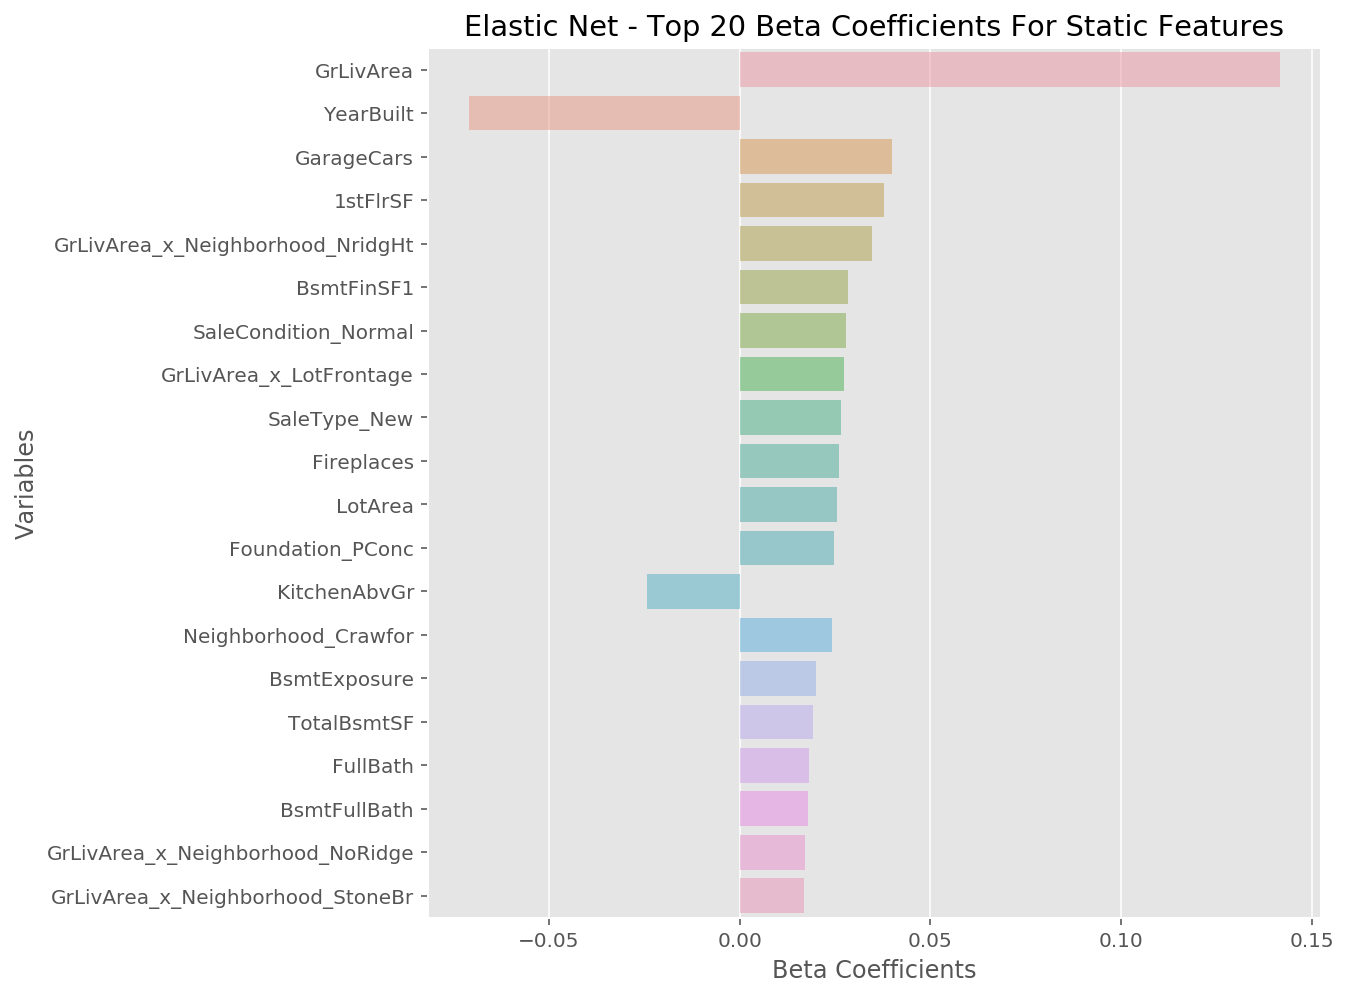

In [343]:
top_20 = elastic_coef[:20]
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x='Coef', y = 'Variables', data= top_20, ax=ax, orient='h', alpha=0.5)
ax.set_title('Elastic Net - Top 20 Beta Coefficients For Static Features')
ax.set_xlabel('Beta Coefficients')
plt.show()

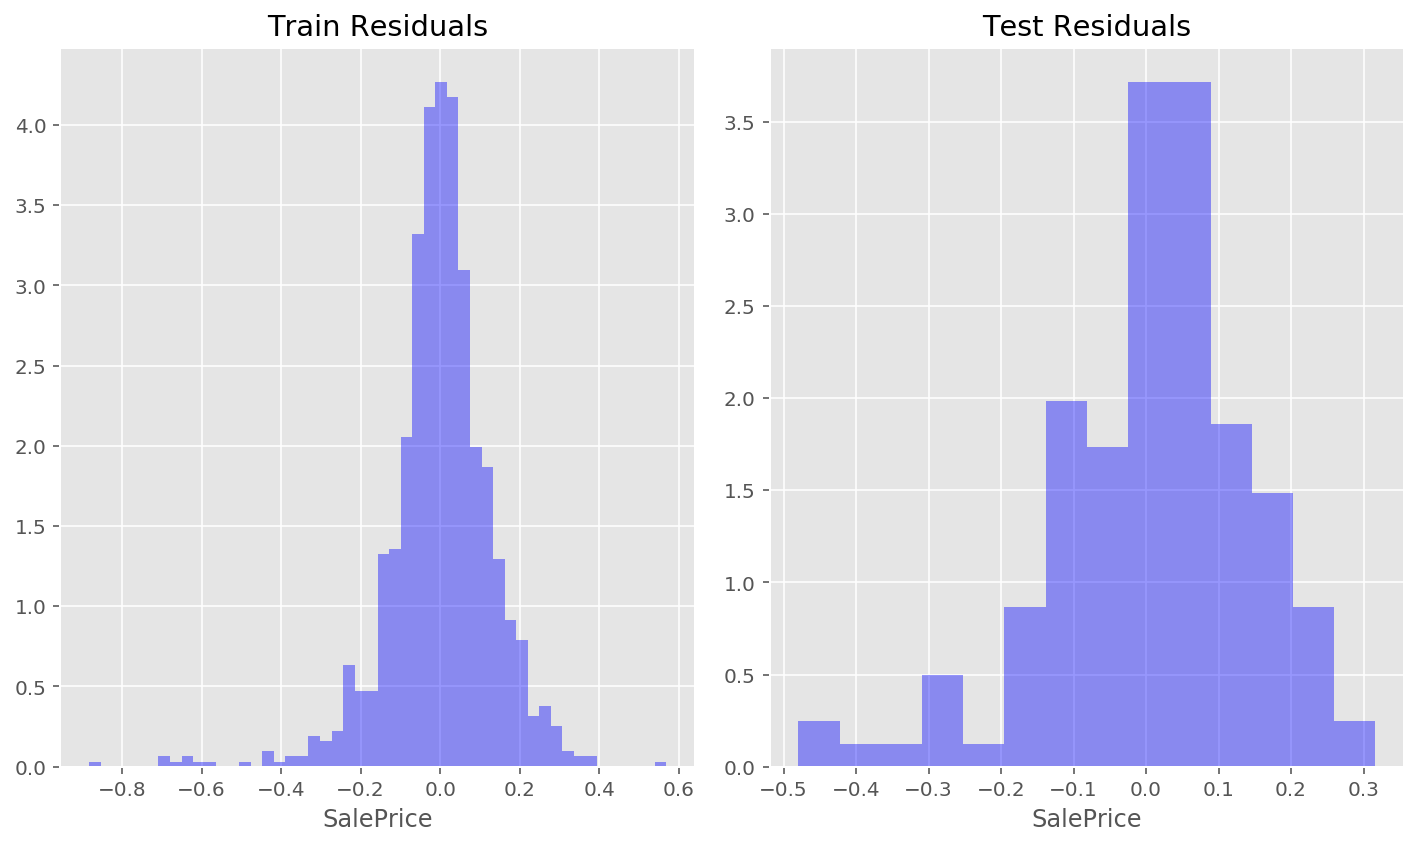

In [344]:
resid_train = y_log_train - model_elastic.predict(X_log_train)
resid_test = y_log_test - model_elastic.predict(X_log_test)
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.distplot(resid_train, kde=False, norm_hist=True, color='Blue', ax=ax[0])
ax[0].set_title('Train Residuals')

sns.distplot(resid_test, kde=False, norm_hist=True, ax=ax[1], color='Blue')
ax[1].set_title('Test Residuals')
fig.tight_layout();

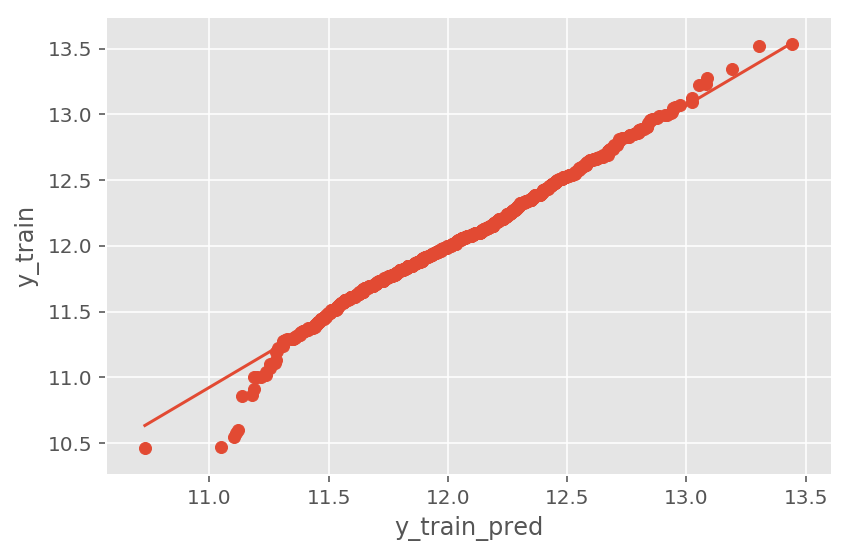

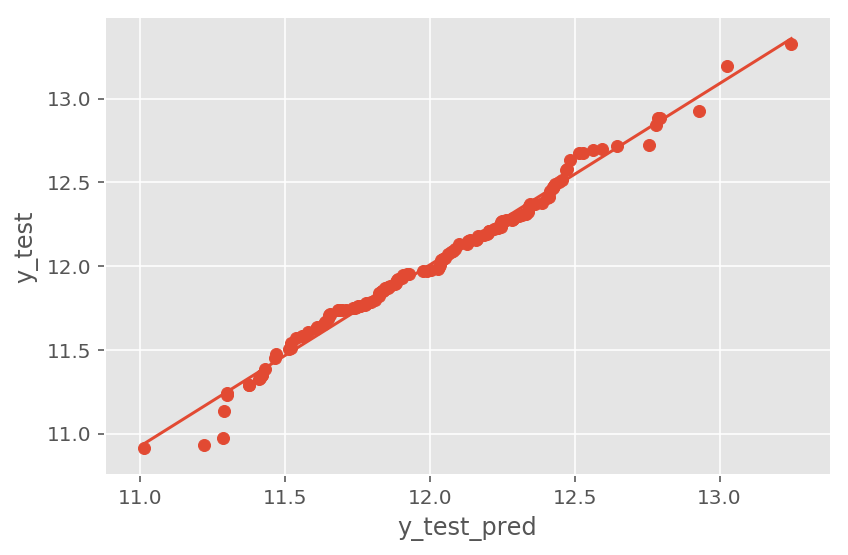

In [345]:
import seaborn_qqplot as sqp
data_train = pd.DataFrame(data={'y_train': y_log_train, 'y_train_pred': model_elastic.predict(X_log_train)})
data_test = pd.DataFrame(data={'y_test': y_log_test, 'y_test_pred': model_elastic.predict(X_log_test)})

sqp.qqplot(data = data_train, x='y_train_pred', y='y_train', height=4, aspect=1.5, display_kws={"identity":False,"fit":True})
sqp.qqplot(data = data_test, x = 'y_test_pred', y='y_test', height=4, aspect=1.5, display_kws={'identity':False, 'fit':True});


# Initial Thoughts

- The body of work above is a demonstration of why I used to constantly emphasise to my former students that you must not chase high ${R}^2$ scores if it comes at the expense of interpretability, otherwise you draw the wrong conclusions from your model. If you observe the coefficients from the different models, it can be seen that there is little consistency amongst the top-20 coefficients - not only does the magnitude of the coefficients change but the list of top 20 features/factors also differ significantly from model to model 
- Interaction effects are significant
- Logged features seem to provide the sort of consistency one would be looking for if they were to use these models to predict house prices in terms of the top 20 coefficients
- Many of these coefficients appear to be related to the size of the house, which is what one would expect
- The logged features only perform marginally better in terms of the test score but it appears the variance between the train and test scores is reduced, which is likely due to the reduced impact of values on the tail end of the distribution after logging the variables. Since, the top-20 coefficients for the log models are much more consistent and the scores display less variance, it makes sense to proceed with the logged features
- I will move forward with the Elastic Net model despite the fact that the Ridge model performed the best as I think it gives too strong of a weighting towards features related to MSZoning. The coefficients related to both the Lasso and Elastic Net make a lot more sense to me and are consistent with each other. Since the L1 ratio is 0.5, the Elastic Net model provides a perfect halfway house between the two models
- The residuals are not normally distributed - it is somewhat centred around 0 with a slight skew, which suggests that the distribution is not symmetric. We see from the QQplots that the model has a tough time predicting the prices of houses towards the lower end. 
- I think it is slightly suspicious that YearBuilt plays such an important role in determining house prices as it is not the first thing that comes to mind when one is trying to price a house. I suspect that this is likely due to confounding with an omitted (renovatable) variable. We 'know' from above that it has a significant interaction with the overall condition of the house, which has not been included in the model thus far. One imagines that as the age of the house increases, the overall conditions tends to go down (assuming no renovations and/or remodelling is done), which leads to a decrease in house prices and potentially a spurious relationship between the sale price of the house and the year built.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovatable features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

**Method**

In order to evaluate the effect of renovatable features on the price of houses, we will regress the residuals obtained from the elastic net model (logged variables) on the renovatable features. The intuition behind this is that the residuals represent the unexplained variance in the dependent variable; in other words, the fixed features explain ~90% of the variance in house prices. Therefore, if we regress the residuals on the renovatable features, we can find how much of the unexplained variance in house prices is explained by the renovatable feature. 

So, why is it that we cannot just regress the logged house prices on the renovatable features given that we show below the model achieves an $R^2$ of ~0.78? The simple answer is that you draw the wrong conclusions because of confounding/omission variable bias. Your estimators will be bias because the model will most likely over-estimate or under-estimate the effect of some of the renovatable features. Regressing the residuals on a variable that you wish to evaluate the effect of in isolation is a common method in fields such as Ecology in hopes of 'controlling' for confounding variables.

In [346]:
elastic_alphas = np.logspace(-5, 5, 200)

optimal_elastic = ElasticNetCV(alphas=ridge_alphas, max_iter= 5000, tol= 0.01, cv=10)
optimal_elastic.fit(X_renov_train, y_log_train)

print(optimal_elastic.alpha_)
print(optimal_elastic.l1_ratio)

0.00325508859983506
0.5


In [347]:
model_elastic = ElasticNet(alpha=optimal_elastic.alpha_)

# get cross validated scores
scores = cross_val_score(model_elastic, X_renov_train, y_log_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model_elastic.fit(X_renov_train, y_log_train)
print("Training Score:", model_elastic.score(X_renov_train, y_log_train))
# evaluate the data on the test set
print("Test Score:", model_elastic.score(X_renov_test, y_log_test))

Cross-validated training scores: [0.78651716 0.79846061 0.79988379 0.77295702 0.80496227 0.72642719
 0.77026206 0.77541527 0.75643965 0.82635065]
Mean cross-validated training score: 0.7817675675158823
Training Score: 0.8107124944934662
Test Score: 0.779352202977208


**Regressing Residuals on Renovatable Features**

In [348]:
elastic_alphas = np.logspace(-5, 5, 200)

optimal_elastic = ElasticNetCV(alphas=ridge_alphas, max_iter= 5000, tol= 0.01, cv=10)
optimal_elastic.fit(X_renov_train, resid_train)

print(optimal_elastic.alpha_)
print(optimal_elastic.l1_ratio)

0.00821434358491943
0.5


In [349]:
# create a lasso model instance
model_elastic = ElasticNet(alpha=optimal_elastic.alpha_)

# get cross validated scores
scores = cross_val_score(model_elastic, X_renov_train, resid_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model_elastic.fit(X_renov_train, resid_train)
print("Training Score:", model_elastic.score(X_renov_train, resid_train))
# evaluate the data on the test set
print("Test Score:", model_elastic.score(X_renov_test, resid_test))

Cross-validated training scores: [0.14876578 0.4031559  0.36495123 0.28319092 0.26002045 0.24618467
 0.17577466 0.38081706 0.25467116 0.13227136]
Mean cross-validated training score: 0.2649803186635526
Training Score: 0.3181313853970169
Test Score: 0.2531579325784785


In [350]:
elastic_coef = pd.DataFrame(model_elastic.coef_, index=renov.drop(columns=['YrSold','SalePrice']).columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
elastic_coef['coef_abs'] = elastic_coef.coefficients.abs()
elastic_coef.sort_values(by='coef_abs', ascending=False, inplace=True)
elastic_coef = elastic_coef.reset_index()
elastic_coef.columns = ['Variables', 'Coef', 'Abs_coef']
elastic_coef.head(20) # top 20 coefficients from the elastic net model

,Variables,Coef,Abs_coef
0,OverallQual_x_OverallCond,0.038140,0.038140
1,OverallCond,0.024381,0.024381
2,Functional_Typ,0.015029,0.015029
3,CentralAir_Y,0.008431,0.008431
4,HeatingQC,0.007930,0.007930
5,BsmtCond,-0.006651,0.006651
6,RoofMatl_WdShngl,0.006465,0.006465
7,Exterior1st_BrkFace,0.005840,0.005840
8,FireplaceQu,-0.005735,0.005735
9,RoofStyle_Gambrel,-0.004481,0.004481


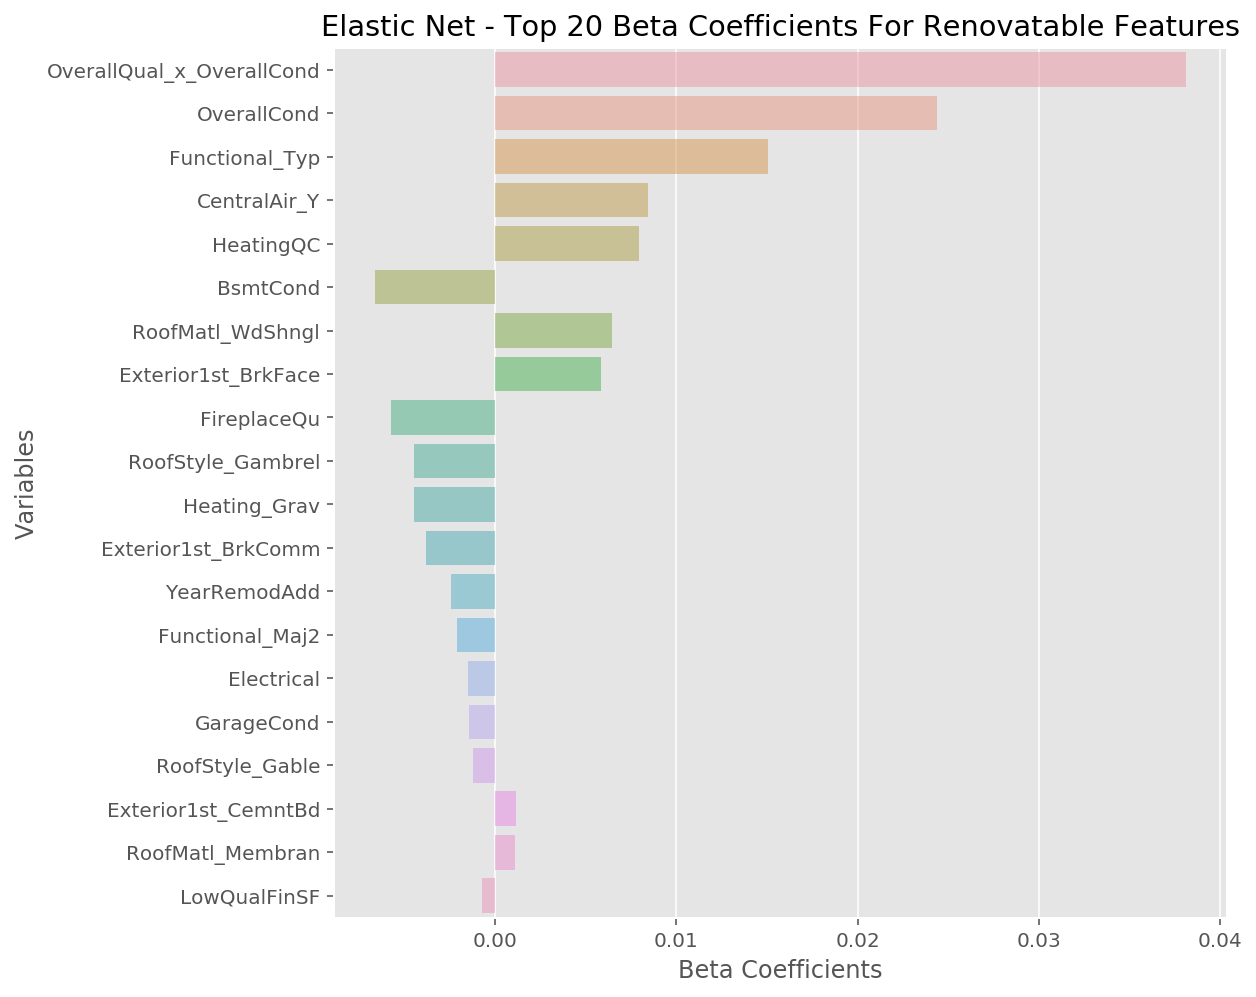

In [351]:
top_20 = elastic_coef[:20]
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x='Coef', y = 'Variables', data= top_20, ax=ax, orient='h', alpha=0.5)
ax.set_title('Elastic Net - Top 20 Beta Coefficients For Renovatable Features')
ax.set_xlabel('Beta Coefficients')
plt.show()

- Evaluate the effect in dollars of the renovatable features.

Obviously, most variables are not nice to interpret because of the transformations that I applied. For the continiuous features that I chose to log and then standardize, we would say that their beta coefficients mean one unit increase in the standard deviation of the logged variable leads to a certain log increase in house prices, which of course is evaluated in dollars. Similarly, with the non-logged variables, we would say that one unit increase in the standard deviation of the variable leads to a certain log increase in house prices. Even though the standardization of variables does not affect the space that your variables are in (it just re-centres the variable) unlike a log-transformation, it is probably unwise to standardize the categorical or dummy variables as they lose interpretability nor does it make much sense to.

----
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 

This is rather self-explanatory - the supposed increase in the value of the house from improving features such as the overall condition of the house needs to be more than the cost of investment for the company to profit (assuming they can sale the renovated property).

----
- Investigate how much of the variance in price remaining is explained by these features.

If we make the assumption that our estimators have little to no bias then the top-2 variables (OverallQual_x_OverallCond and OverallCond) are the only two that would break into the previous top 20 coefficients. Aside from the top-3 or so variables, renovatable features appear to have little impact on house prices, which is reflected in the $R^2$ score of ~0.25, which suggests that roughly 25% of the unexplained variance can be explained by the renovatable features. As a side note, most of the interactions suggested as statistically significant by the Mancova model above do not appear in the top-20 coefficients.

----
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

No. The $R^2$ score could be 0.99 and I still would not trust the model. First of all, we must understand the limitations of our dataset. The observational nature of the data means that causal inferences cannot be drawn. Furthermore, we are only looking at house prices from 2006-2010, which means the model is unlikely to be reliable at other periods of time. Besides, even if the data did capture the cyclical nature of house prices, a regression model would be insufficient anyway given that the data would no longer be cross-sectional. We are now in a completely different economic environment anyway so the past cyclical nature of house prices may no longer be valid because we were in a low-interest rate environment for almost a decade. Outside of Iowa, this model is not applicable because different housing markets are obviously non-homogeneous. You would not apply this model to the Hong Kong and London housing markets. Probably the most crucial limitation of the data is the fact there are features that may have a significant effect on house prices which are not included in the dataset and therefore are not accounted for in my model. 

Taking a closer look at the cross validation scores for the second model, we see that there is huge variance amongst the scores despite how close the cross validation score and test score are. The lack of consistency amongst the scores seems to suggest that the score is dependent on which part of the dataset it is trained and tested on.

At best, we can only use the model as guidance in terms of what are the most important features since the estimators are biased. It has only come to my attention recently that GrLivArea is the sum of the 1stFlrSF and 2ndFlrSF, similarly with TotalBsmtSF, which is the sum of BsmtFinSF1, BsmtFinSF2, BsmtUnfSF. It is one thing to suffer from highly correlated explanatory variable but to actually have an exact endogenous features, one of which (GrLivArea) has a large main and interaction effect in the model. Therefore, we cannot draw conclusions about the effects of these features in isolation; mathematically, the coefficient for 1stFlrSF cannot be obtained by simply taking the partial derivative of the house price w.r.t 1stFlrSF because GrLivArea is a function of 1stFlrSF and 2ndFlrSF. By nature, you cannot control for such features - it is not like you can change the 1stFlrSF so easily that you can set up a study to evaluate such effects in order to see what potential buyers would be willing to pay, not to mention that GrLivArea would also increase. Omitting the variables is also not a valid solution as it would lead to further bias in the estimators. We have already seen what happens when you leave out important features like the fixed features, which pertains to what I mentioned in the limitations of the data. The same thing applies, regardless of whether I use all the features given to me in one model. The idea that external features can covary with features in the model is aptly demonstrated by the estimator for YearBuilt I believe. 

----